## Phase 3 Project Submission
- Student name : Yvonne Kamari
- Student Pace : Part time
- Scheduled revie date : 23rd October 2023
- Instructor : Samuel Karu





# Faulty Water Pump Detection for Enhanced Access to Clean Water in Tanzania

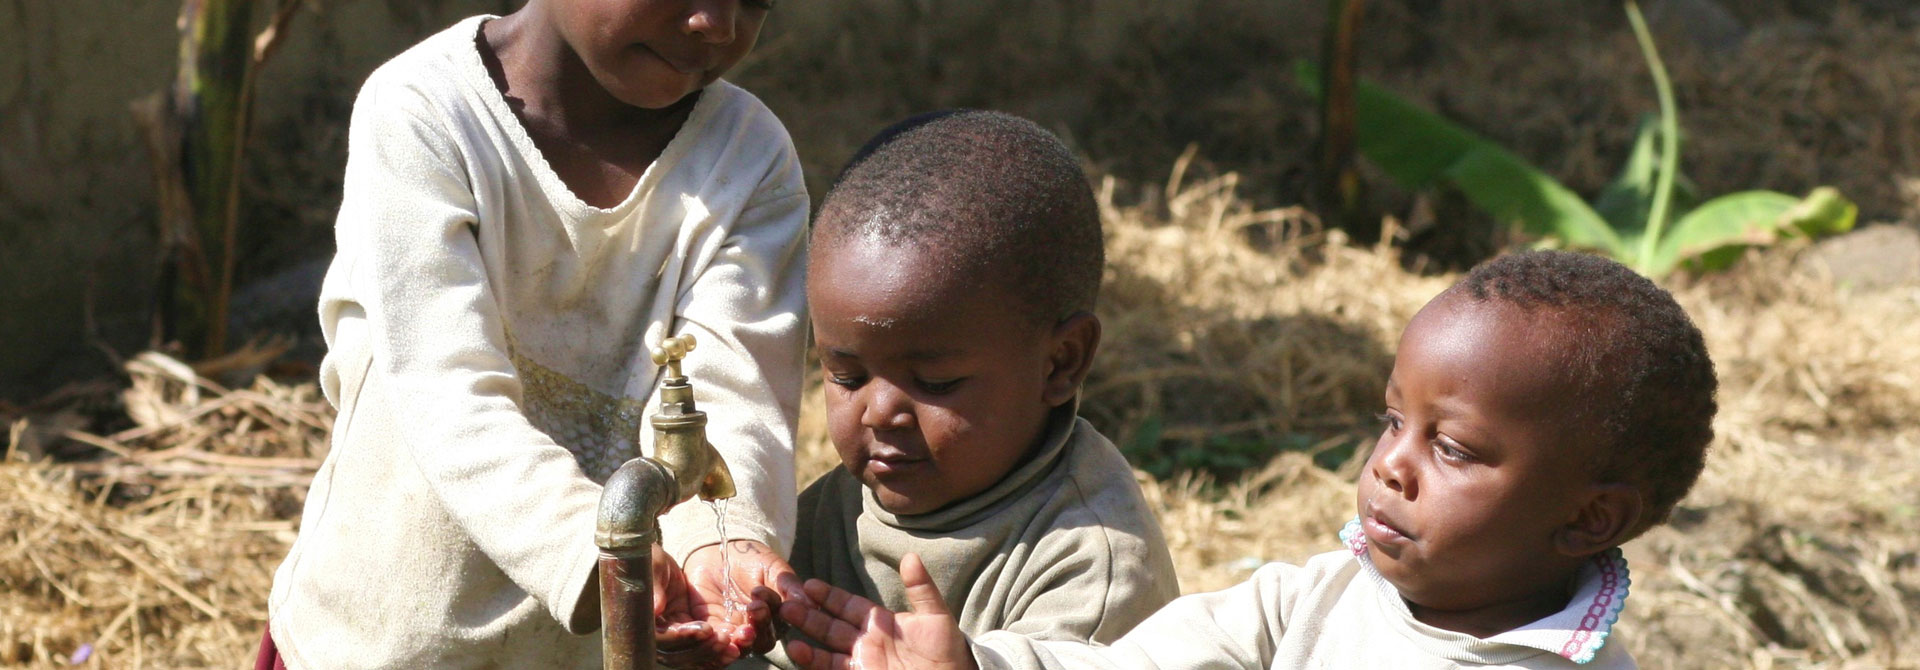

# Business Problem

Tanzania is among the most populous nations on the African continent with an estimated population of over [60 million perople in 2022](https://www.nbs.go.tz/nbs/takwimu/Census2022/Administrative_units_Population_Distribution_Report_Tanzania_volume1a.pdf).

Tanzania's rural areas heavily rely on water wells, boreholes, and hand-dug wells as primary sources of drinking water. Access to clean and safe water varies significantly across different regions, with urban areas having better access compared to rural areas. Hand-pumped and mechanized water wells are common infrastructure for water supply, especially in remote and underserved regions.

Despite the presence of various water sources, access to clean and safe drinking water is a significant challenge in Tanzania. Water quality can be poor in some areas due to contamination from pollutants, bacteria, and inadequate sanitation practices. Many Tanzanians, especially in rural areas, rely on open water sources, which can be contaminated and unsafe for consumption.

[According to the World Bank, only 61% of households in Tanzania currently have access to a basic water-supply, 32% have access to basic sanitation, and 48% have access to basic hygiene, according to SDG definitions](https://www.worldbank.org/en/country/tanzania/publication/tanzania-economic-update-universal-access-to-water-and-sanitation-could-transform-social-and-economic-development#:~:text=Only%2061%25%20of%20households%20in,hygiene%2C%20according%20to%20SDG%20definitions.). Access to clean water is a critical issue impacting public health, as it is directly related to the prevalence of waterborne diseases, such as cholera and dysentery.

# Project Objective

The aim of this project is to develop a predictive model that can determine the operating condition of water pumps in Tanzania. This prediction serves the purpose of identifying faulty water pumps, ultimately promoting increased access to clean and safe drinking water across the country.

 Additionally, the project seeks to determine the key factors influencing the functionality of waterpoints, such as water quality, water point installer and water quantity.  Furthermore, it aims to pinpoint regions with a high prevalence of non-functional pumps to ensure equitable water access for all.

The intended audience for this project is a non-governmental organization (NGO) with a focus on well maintenance and repair. The model's predictions will assist the NGO in identifying and prioritizing wells that require attention and maintenance.

By accurately identifying faulty water pumps, the project aims to contribute to the greater goal of improving access to clean and potable water in Tanzania. This has significant implications for public health and the well-being of local communities.

# Data Understanding

The dataset is sourced from Taarifa and the Tanzanian Ministry of Water, aiming to facilitate the identification of waterpoints functionality statuses. This dataset was originally compiled for the ["Pump it Up: Data Mining the Water Table"](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/)  competition on [Driven Data](https://www.drivendata.org/).

The dataset contains the following set of information about the waterpoints:
* __amount_tsh__ - Total static head (amount water available to waterpoint)
* __date_recorded__ - The date the row was entered
* __funder__ - Who funded the well
* __gps_height__ - Altitude of the well
* __installer__ - Organization that installed the well
* __longitude__ - GPS coordinate
* __latitude__ - GPS coordinate
* __wpt_name__ - Name of the waterpoint if there is one
* __num_private__
* __basin__ - Geographic water basin
* __subvillage__ - Geographic location
* __region__ - Geographic location
* __region_code__ - Geographic location (coded)
* __district_code__ - Geographic location (coded)
* __lga__ - Geographic location
* __ward__ - Geographic location
* __population__ - Population around the well
* __public_meeting__ - True/False
* __recorded_by__ - Group entering this row of data
* __scheme_management__ - Who operates the waterpoint
* __scheme_name__ - Who operates the waterpoint
* __permit__ - If the waterpoint is permitted
* __construction_year__ - Year the waterpoint was constructed
* __extraction_type__ - The kind of extraction the waterpoint uses
* __extraction_type_group__ - The kind of extraction the waterpoint uses
* __extraction_type_class__ - The kind of extraction the waterpoint uses
* __management__ - How the waterpoint is managed
* __management_group__ - How the waterpoint is managed
* __payment__ - What the water costs
* __payment_type__ - What the water costs
* __water_quality__ - The quality of the water
* __quality_group__ - The quality of the water
* __quantity__ - The quantity of water
* __quantity_group__ - The quantity of water
* __source__ - The source of the water
* __source_type__ - The source of the water
* __source_class__ - The source of the water
* __waterpoint_type__ - The kind of waterpoint
* __waterpoint_type_group__ - The kind of waterpoint

The status of the waterpoints are labelled as follows:
* __functional__ - the waterpoint is operational and there are no repairs needed
* __functional needs repair__ - the waterpoint is operational, but needs repairs
* __non functional__ - the waterpoint is not operational

# Importing the Required Libraries & Models

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import folium
from folium.plugins import FastMarkerCluster

import warnings

warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.model_selection import cross_val_predict, cross_val_score, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.dummy import DummyClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Scalers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.preprocessing import OneHotEncoder

# Exploratory Data Analysis

In [3]:
# Read the training set data into a dataframe
df_train_set = pd.read_csv(r"C:\Users\user\Documents\Moringa\phase_3\PROJECT\training_set_values.csv")
df_train_set

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [4]:
# Read the training set labels into a dataframe
df_train_labels = pd.read_csv(r"C:\Users\user\Documents\Moringa\phase_3\PROJECT\training_set_labels.csv")
df_train_labels

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


The training dataset comprises information for 59,400 water wells, each characterized by 40 distinct features. The training labels dataset also pertains to the same 59,400 water points, but it only contains information about the identification numbers of these points and their respective statuses.

We merge the two dataframes into one to create a comprehensive dataset that associates the features of each water well with its corresponding status. This simplifies the data handling and analysis, making it easier to draw insights and make informed decisions regarding well conditions and maintenance.

### Merging the Datasets

In [5]:
#Merge datasets
df = pd.merge(df_train_labels, df_train_set, how = 'inner', on='id')
df.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [6]:
df.tail()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
59395,60739,functional,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,functional,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,functional,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,functional,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
59399,26348,functional,0.0,2011-03-23,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,...,on failure,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [7]:
# Display summary information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55765 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59400 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

We observe the following key points from the summary information: 
1. The data includes columns of different data types:
- 3 columns with floating-point numbers (dtype: float64).
-  7 columns with integer values (dtype: int64).
- 31 columns with object data type, likely indicating categorical or text data.

2. Several columns have missing data. For example, columns like "funder," "installer," "subvillage," "scheme_management," "scheme_name," "permit," and "public_meeting" have missing values.


3. Many of the columns are categorical in nature, containing information such as region, extraction type, management, and waterpoint type.

### Check for Missing Values

In [8]:
# Sum the total missing values in each column
df.isnull().sum()

id                           0
status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

id                        0.000000
status_group              0.000000
amount_tsh                0.000000
date_recorded             0.000000
funder                    6.119529
gps_height                0.000000
installer                 6.153199
longitude                 0.000000
latitude                  0.000000
wpt_name                  0.000000
num_private               0.000000
basin                     0.000000
subvillage                0.624579
region                    0.000000
region_code               0.000000
district_code             0.000000
lga                       0.000000
ward                      0.000000
population                0.000000
public_meeting            5.612795
recorded_by               0.000000
scheme_management         6.526936
scheme_name              47.417508
permit                    5.144781
construction_year         0.000000
extraction_type           0.000000
extraction_type_group     0.000000
extraction_type_class     0.000000
management          

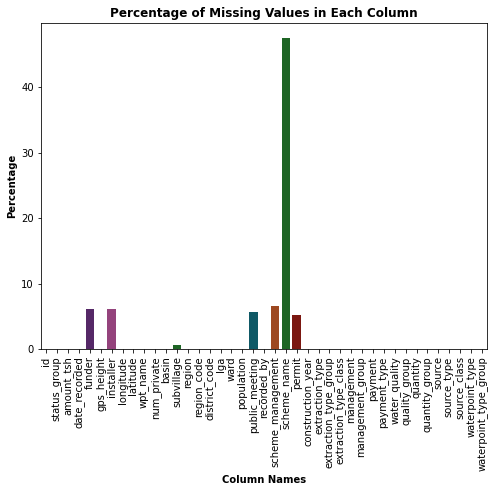

In [9]:
# Find the percentage of missing values in each column
perc_missing_values = df.isnull().sum()\
                    * 100 / len (df)
print(perc_missing_values) 

# Plot the percentage of missing values in a barplot
plt.figure(figsize=(8, 6))
sns.barplot(x=perc_missing_values.index, y=perc_missing_values.values, palette='dark')
plt.title("Percentage of Missing Values in Each Column", fontweight='bold')
plt.ylabel("Percentage", fontweight='bold')
plt.xlabel("Column Names", fontweight='bold')
plt.xticks(rotation=90)

plt.show()

- The "scheme_name" column has a considerable number of missing values, approximately 47.42% missing. This feature may present challenges in understanding the specific schemes associated with the water wells.
- The "funder", "installer" and "scheme_management" columns have missing values, roughly 6.12%, 6.15%  and 6.53% missing, respectively.
- The "public_meeting" and "permit" columns each have missing values, with approximately 5.61% and 5.14% missing.
- Of the columns with missing values, the "subvillage" column has the smallest percentage with 0.62%.

### Check for Duplicates & Similar Data

Some columns in the dataset contain potentially similar or duplicated data. To address this, we conduct an inspection by checking the value counts of these columns, such as "scheme_management" and "management." This allows us to determine which columns provide unique and valuable information and which ones might be redundant. Our goal is to streamline the dataset, retaining only the most relevant columns for our analysis to ensure efficiency and avoid unnecessary duplication.

In [10]:
# Check for duplicates
df[df.duplicated()]

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group


In [11]:
# Value counts for the "scheme_management" column
scheme_management_counts = df['scheme_management'].value_counts()
print("Value counts for 'scheme_management':")
print(scheme_management_counts)
print("\n")

# Value counts for the "management" column
management_counts = df['management'].value_counts()
print("Value counts for 'management':")
print(management_counts)

Value counts for 'scheme_management':
VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64


Value counts for 'management':
vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64


We compare the value counts for 'scheme_management' and 'management,' both describing water well management. As 'scheme_management' contains 3,877 missing values, we choose to retain the __'management'__ column for a more complete dataset, ensuring data reliability.

In [12]:
# Value counts for the "payment" column
payment_counts = df['payment'].value_counts()
print("Value counts for 'payment':")
print(payment_counts)
print("\n")

# Value counts for the "payment_type" column
payment_type_counts = df['payment_type'].value_counts()
print("Value counts for 'payment_type':")
print(payment_type_counts)

Value counts for 'payment':
never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64


Value counts for 'payment_type':
never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64


Both __'payment'__ and __'payment_type'__ contain similar information about payment methods, we can therefore drop either one of these columns from our model.

In [13]:
# Value counts for the "extraction_type" column
extraction_type_counts = df['extraction_type'].value_counts()
print("Value counts for 'extraction_type':")
print(extraction_type_counts)
print("\n")

# Value counts for the "extraction_type_group" column
extraction_type_group_counts = df['extraction_type_group'].value_counts()
print("Value counts for 'extraction_type_group':")
print(extraction_type_group_counts)
print("\n")

# Value counts for the "extraction_type_class" column
extraction_type_class_counts = df['extraction_type_class'].value_counts()
print("Value counts for 'extraction_type_class':")
print(extraction_type_class_counts)

Value counts for 'extraction_type':
gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64


Value counts for 'extraction_type_group':
gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
othe

We choose to keep __'extraction_type_class'__ for modeling as it provides a an aggregated overview of extraction methods. This maintains model efficiency while capturing essential information about water extraction methods.

In [14]:
# Value counts for the "water_quality" column
water_quality_counts = df['water_quality'].value_counts()
print("Value counts for 'water_quality':")
print(water_quality_counts)
print("\n")

# Value counts for the "quality_group" column
quality_group_counts = df['quality_group'].value_counts()
print("Value counts for 'quality_group':")
print(quality_group_counts)

Value counts for 'water_quality':
soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64


Value counts for 'quality_group':
good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64


__'water_quality'__ offers detailed information, including categories like "salty abandoned" and "fluoride abandoned," essential for a broader understanding of water quality variations. Retaining 'water_quality' benefits our model by providing access to a wide range of attributes, enhancing our analysis.

In [15]:
# Value counts for the "quantity" column
quantity_counts = df['quantity'].value_counts()
print("Value counts for 'quantity':")
print(quantity_counts)
print("\n")

# Value counts for the "quantity_group" column
quantity_group_counts = df['quantity_group'].value_counts()
print("Value counts for 'quantity_group':")
print(quantity_group_counts)

Value counts for 'quantity':
enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64


Value counts for 'quantity_group':
enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64


Either the __'quantity'__ or __'quantity_group'__ column can be dropped since they contain identical data, as evidenced by the matching value counts. Retaining one of them is sufficient for modeling.

In [16]:
# Value counts for the "source" column
source_counts = df['source'].value_counts()
print("Value counts for 'source':")
print(source_counts)
print("\n")

# Value counts for the "source_type" column
source_type_counts = df['source_type'].value_counts()
print("Value counts for 'source_type':")
print(source_type_counts)
print("\n")

# Value counts for the "source_class" column
source_class_counts = df['source_class'].value_counts()
print("Value counts for 'source_class':")
print(source_class_counts)

Value counts for 'source':
spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64


Value counts for 'source_type':
spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64


Value counts for 'source_class':
groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64


__'source_type'__ offers a more aggregated view of water sources while still maintaining important distinctions. 'source_type' avoids the difficulty of handling "unknown" values, which are akin to missing data in a categorical context. By focusing on broader source types, we can maintain data completeness and effectively capture the critical aspects of water sources for our model.

In [17]:
# Value counts for the "waterpoint_type" column
waterpoint_type_counts = df['waterpoint_type'].value_counts()
print("Value counts for 'waterpoint_type':")
print(waterpoint_type_counts)
print("\n")

# Value counts for the "waterpoint_type_group" column
waterpoint_type_group_counts = df['waterpoint_type_group'].value_counts()
print("Value counts for 'waterpoint_type_group':")
print(waterpoint_type_group_counts)

Value counts for 'waterpoint_type':
communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64


Value counts for 'waterpoint_type_group':
communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64


__'waterpoint_type'__ provides a more detailed breakdown of water point types, which can be essential for classifying water wells accurately by ensuring that the model has access to a more comprehensive set of categories.

In [18]:
# Display 'funder' and 'installer' columns
df[['funder', 'installer']]

,funder,installer
0,Roman,Roman
1,Grumeti,GRUMETI
2,Lottery Club,World vision
3,Unicef,UNICEF
4,Action In A,Artisan
...,...,...
59395,Germany Republi,CES
59396,Cefa-njombe,Cefa
59397,NaN,NaN
59398,Malec,Musa


In [19]:
# Convert 'funder' and 'installer' columns to sets of unique values
funder_set = set(df['funder'].unique())
installer_set = set(df['installer'].unique())

# Find the common values between the two sets
common_values = funder_set.intersection(installer_set)

# Count of common values
common_count = len(common_values)
print("Number of common values between 'funder' and 'installer' columns:", common_count)

Number of common values between 'funder' and 'installer' columns: 489


Identifying 489 common values between the 'funder' and 'installer' columns raises concerns about data redundancy. Duplicating information in both columns can complicate data preprocessing and affect model performance. To avoid potential misinterpretations, we opt to retain only the 'installer' feature, as it likely has a more direct impact on water pump functionality.

### Descriptive Statistics

In [20]:
# Display statistics for numeric data
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


- The "id" column represents unique identifiers for each water well. The dataset contains 59,400 records, with no missing values.
- The mean amount of water available at each water well is approximately 317.65, with a wide range of values. The standard deviation of 2,997.57 suggests significant variation in the water amounts across the water points, with a minimum of 0 and a maximum of 350,000.
- The mean GPS height is about 668.30 meters, with a standard deviation of 693.12. The data ranges from a minimum of -90 meters to a maximum of 2,770 meters.
- The mean longitude of the water wells is around 34.08, and the mean latitude is approximately -5.71. The data spans a wide range of longitudes and latitudes, with some extreme values.
- The mean value of private use water points is approximately 0.47, with a standard deviation of 12.24. Most values are 0, but there is a maximum value of 1,776, indicating variations in the number of private use water points.
- The region_code and district_code encode the geographic locations of the water wells. The data is well-distributed across regions and districts, with region codes ranging from 1 to 99 and district codes from 0 to 80.
- The average population around each water point is approximately 179.91, with a wide range of values and some zero entries. The data ranges from 0 to a maximum of 30,500.
- The mean construction year is about 1,300.65, with a standard deviation of 951.62. The data spans from 0 to a maximum construction year of 2013, with a median year of 1986.

The presence of a significant number of zeros in certain columns, such as "amount_tsh," "num_private," and "population," could indicate missing data or meaningful values of zero. We will examine the data more closely to understand why there are many zeros in these columns. For example, zeros in "amount_tsh" may represent wells with no recorded water quantity, while zeros in "population" could indicate unpopulated areas.

# Data Cleaning & Preprocessing

To optimize our dataset for modeling, we will eliminate features with identical or similar data, enhancing both the dataset's clarity and the model's performance. Redundant features, if retained, can introduce noise and complexity into the model, potentially causing overfitting and reducing interpretability. Additionally, we will address features with a substantial number of zeros to prevent any adverse effects on model performance and thoroughly review data for misspellings.

In [21]:
# Create a copy of the dataframe
df_copy = df.copy()

# List of columns to drop
columns_to_drop = ['id', 'date_recorded', 'funder', 'wpt_name', 'num_private', 'subvillage', 'region_code',
                   'district_code', 'ward', 'lga', 'public_meeting', 'recorded_by', 'scheme_management', 
                   'scheme_name', 'extraction_type', 'extraction_type_group', 'management_group', 'payment',
                   'quality_group', 'quantity_group', 'source', 'source_class', 'waterpoint_type_group']

# Drop the specified columns
df_copy.drop(columns=columns_to_drop, inplace=True)

In [22]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           59400 non-null  object 
 1   amount_tsh             59400 non-null  float64
 2   gps_height             59400 non-null  int64  
 3   installer              55745 non-null  object 
 4   longitude              59400 non-null  float64
 5   latitude               59400 non-null  float64
 6   basin                  59400 non-null  object 
 7   region                 59400 non-null  object 
 8   population             59400 non-null  int64  
 9   permit                 56344 non-null  object 
 10  construction_year      59400 non-null  int64  
 11  extraction_type_class  59400 non-null  object 
 12  management             59400 non-null  object 
 13  payment_type           59400 non-null  object 
 14  water_quality          59400 non-null  object 
 15  qu

### Cleaning the Features

After examining the __'installer'__ feature, we discovered 2146 distinct values, presenting a potential challenge for data encoding and predictive model development. Our analysis also unveiled several misspelled entries and variations in the names of some entities. We therefore took steps to rectify these data entry issues.

In [23]:
print(len(df_copy['installer'].unique()))

2146


In [24]:
df_copy['installer']

0               Roman
1             GRUMETI
2        World vision
3              UNICEF
4             Artisan
             ...     
59395             CES
59396            Cefa
59397             NaN
59398            Musa
59399           World
Name: installer, Length: 59400, dtype: object

In [25]:
# Clean entries in the 'installer' feature
df_copy['installer'] = df_copy['installer'].replace(to_replace = ('Central government', 'Tanzania Government',
                                          'Cental Government','Tanzania government','Cebtral Government', 
                                          'Centra Government', 'central government', 'CENTRAL GOVERNMENT', 
                                          'TANZANIA GOVERNMENT', 'TANZANIAN GOVERNMENT', 'Central govt', 
                                          'Centr', 'Centra govt', 'Tanzanian Government', 'Tanzania', 
                                          'Tanz', 'Tanza', 'GOVERNMENT', 
                                          'GOVER', 'GOVERNME', 'GOVERM', 'GOVERN', 'Gover', 'Gove', 
                                          'Governme', 'Governmen', 'Got', 'Serikali', 'Serikari', 'Government',
                                          'Central Government'), 
                                          value = 'Central Government')

df_copy['installer'] = df_copy['installer'].replace(to_replace = ('IDARA', 'Idara ya maji', 'MINISTRY OF WATER',
                                          'Ministry of water', 'Ministry of water engineer', 'MINISTRYOF WATER', 
                                          'MWE &', 'MWE', 'Wizara ya maji', 'WIZARA', 'wizara ya maji',
                                          'Ministry of Water'), 
                                          value ='Ministry of Water')

df_copy['installer'] = df_copy['installer'].replace(to_replace = ('District COUNCIL', 'DISTRICT COUNCIL',
                                          'Counc','District council','District Counci', 
                                          'Council', 'COUN', 'Distri', 'Halmashauri ya wilaya',
                                          'Halmashauri wilaya', 'District Council'), 
                                          value = 'District  Council')

df['installer'] = df['installer'].replace(to_replace = ('District water depar', 'District Water Department', 
                                          'District water department', 'Distric Water Department'),
                                          value = 'District Water Department')

df_copy['installer'] = df_copy['installer'].replace(to_replace = ('villigers', 'villager', 'villagers', 'Villa', 'Village',
                                          'Villi', 'Village Council', 'Village Counil', 'Villages', 'Vill', 
                                          'Village community', 'Villaers', 'Village Community', 'Villag',
                                          'Villege Council', 'Village council', 'Villege Council', 'Villagerd', 
                                          'Villager', 'VILLAGER', 'Villagers',  'Villagerd', 'Village Technician', 
                                          'Village water attendant', 'Village Office', 'VILLAGE COUNCIL',
                                          'VILLAGE COUNCIL .ODA', 'VILLAGE COUNCIL Orpha', 'Village community members', 
                                          'VILLAG', 'VILLAGE', 'Village Government', 'Village government', 
                                          'Village Govt', 'Village govt', 'VILLAGERS', 'VILLAGE WATER COMMISSION',
                                          'Village water committee', 'Commu', 'Communit', 'commu', 'COMMU', 'COMMUNITY', 
                                           'Comunity', 'Communit', 'Kijiji', 'Serikali ya kijiji', 'Community'), 
                                          value ='Community')

df_copy['installer'] = df_copy['installer'].replace(to_replace = ('FinW', 'Fini water', 'FINI WATER', 'FIN WATER',
                                          'Finwater', 'FINN WATER', 'FinW', 'FW', 'FinWater', 'FiNI WATER', 
                                          'FinWate', 'FINLAND', 'Fin Water', 'Finland Government'), 
                                          value ='Finnish Government')

df_copy['installer'] = df_copy['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC', 'RC Ch', 'RC C', 'RC CH',
                                          'RC church', 'RC CATHORIC', 'Roman Church', 'Roman Catholic',
                                          'Roman catholic', 'Roman Ca', 'Roman', 'Romam', 'Roma', 
                                          'ROMAN CATHOLIC', 'Kanisa', 'Kanisa katoliki'), 
                                          value ='Roman Catholic Church')

df_copy['installer'] = df_copy['installer'].replace(to_replace = ('Dmdd', 'DMDD'), value ='DMDD') 

df_copy['installer'] = df_copy['installer'].replace(to_replace = ('TASA', 'Tasaf', 'TASAF 1', 'TASAF/', 'TASF',
                                          'TASSAF', 'TASAF'), value ='TASAF') 

df_copy['installer'] = df_copy['installer'].replace(to_replace = ('RW', 'RWE'), value ='RWE')

df_copy['installer'] = df_copy['installer'].replace(to_replace = ('SEMA CO LTD', 'SEMA Consultant', 'SEMA'), value ='SEMA')

df_copy['installer'] = df_copy['installer'].replace(to_replace = ('DW E', 'DW#', 'DW$', 'DWE&', 'DWE/', 'DWE}', 
                                         'DWEB', 'DWE'), value ='DWE')

df_copy['installer'] = df_copy['installer'].replace(to_replace = ('No', 'NORA', 'Norad', 'NORAD/', 'NORAD'), 
                                          value ='NORAD') 

df_copy['installer'] = df_copy['installer'].replace(to_replace = ('Ox', 'OXFARM', 'OXFAM'), value ='OXFAM') 

df_copy['installer'] = df_copy['installer'].replace(to_replace = ('PRIV', 'Priva', 'Privat', 'private', 'Private company',
                                          'Private individuals', 'PRIVATE INSTITUTIONS', 'Private owned',
                                          'Private person', 'Private Technician', 'Private'), 
                                          value ='Private') 

df_copy['installer'] = df_copy['installer'].replace(to_replace = ('Ch', 'CH', 'Chiko', 'CHINA', 'China',
                                            'China Goverment'), value ='Chinese Goverment')

df_copy['installer'] = df_copy['installer'].replace(to_replace = ('Unisef','Unicef', 'UNICEF'), value ='UNICEF')
                                          
df_copy['installer'] = df_copy['installer'].replace(to_replace = ('Wedeco','WEDEKO', 'WEDECO'), value ='WEDECO')

df_copy['installer'] = df_copy['installer'].replace(to_replace = ('Wo','WB', 'Word Bank', 'Word bank', 'WBK',
                                          'WORDL BANK', 'World', 'world', 'WORLD BANK', 'World bank',
                                          'world banks', 'World banks', 'WOULD BANK', 'World Bank'), 
                                          value ='World Bank')
                                          
df_copy['installer'] = df_copy['installer'].replace(to_replace = ('Lga', 'LGA'), value ='LGA')

df_copy['installer'] = df_copy['installer'].replace(to_replace = ('World Division', 'World Visiin', 
                                         'World vision', 'WORLD VISION', 'world vision', 'World Vission', 
                                          'World Vision'), 
                                          value ='World Vision')

df_copy['installer'] = df_copy['installer'].replace(to_replace = ('Local', 'Local technician', 'Local  technician',
                                         'local  technician', 'LOCAL CONTRACT', 'local fundi', 
                                         'Local l technician', 'Local te', 'Local technical', 'Local technical tec',
                                         'local technical tec', 'local technician', 'Local technitian',
                                         'local technitian', 'Locall technician', 'Localtechnician',
                                         'Local Contractor'), 
                                          value ='Local Contractor')
                                          
df_copy['installer'] = df_copy['installer'].replace(to_replace = ('DANID', 'DANNY', 'DANNIDA', 'DANIDS', 
                                         'DANIDA CO', 'DANID', 'Danid', 'DANIAD', 'Danda', 'DA',
                                         'DENISH', 'DANIDA'), 
                                          value ='DANIDA')

df_copy['installer'] = df_copy['installer'].replace(to_replace =('Adrs', 'Adra', 'ADRA'), value ='ADRA')
                                          
df_copy['installer'] = df_copy['installer'].replace(to_replace = ('Hesawa', 'hesawa', 'HESAW', 'hesaw',
                                          'HESAWQ', 'HESAWS', 'HESAWZ', 'hesawz', 'hesewa', 'HSW',
                                          'HESAWA'),
                                          value ='HESAWA')

df_copy['installer'] = df_copy['installer'].replace(to_replace = ('Jaica', 'JAICA', 'Jica', 'Jeica', 'JAICA CO', 'JALCA',
                                          'Japan', 'JAPAN', 'JAPAN EMBASSY', 'Japan Government', 'Jicks',
                                          'JIKA', 'jika', 'jiks', 'Embasy of Japan in Tanzania', 'JICA'), 
                                          value ='JICA')

df_copy['installer'] = df_copy['installer'].replace(to_replace = ('KKT', 'KK', 'KKKT Church', 'KkKT', 'KKT C',
                                          'KKKT'), value ='KKKT')

df_copy['installer'] = df_copy['installer'].replace(to_replace = ('0', 'Not Known', 'not known', 'Not kno'), value ='Unknown')

In [26]:
print(len(df_copy['installer'].unique()))

1907


In [27]:
df_copy['installer'].value_counts().head(20)

DWE                      17428
Central Government        3824
Community                 2189
DANIDA                    1767
HESAWA                    1499
RWE                       1220
District  Council         1184
KKKT                       950
Finnish Government         823
Unknown                    805
World Vision               714
TCRS                       707
CES                        610
Ministry of Water          558
Roman Catholic Church      521
TASAF                      484
JICA                       457
LGA                        413
WEDECO                     400
NORAD                      396
Name: installer, dtype: int64

To streamline the dataset, I opted to consolidate the installers outside of the top 20 into a single __'OTHER'__ category since they collectively represented less than 1% of the total count. This approach helps to reduce the dimensionality of the dataset while retaining the most significant installer information.

In [28]:
# Keep the top 20 installers
top20_installers = df_copy.installer.value_counts(normalize=True).head(20).index.tolist()  


df_copy['installer'] = [type_ if type_ in top20_installers
                      else "OTHER" for type_ in df_copy['installer']]

In [29]:
df_copy['installer'].value_counts()

OTHER                    22451
DWE                      17428
Central Government        3824
Community                 2189
DANIDA                    1767
HESAWA                    1499
RWE                       1220
District  Council         1184
KKKT                       950
Finnish Government         823
Unknown                    805
World Vision               714
TCRS                       707
CES                        610
Ministry of Water          558
Roman Catholic Church      521
TASAF                      484
JICA                       457
LGA                        413
WEDECO                     400
NORAD                      396
Name: installer, dtype: int64

To enhance data quality and consistency, we have proceeded to convert the case of specific columns from mixed to lowercase since inconsistent case usage, can introduce issues like data duplication or incorrect classification. Maintaining a uniform lowercase format is particularly valuable when generating new features or encoding categorical variables, as it safeguards against errors and supports standardized data handling. 

In [30]:
# Convert 'installer' column to lowercase
df_copy['installer'] = df_copy['installer'].str.lower()

# Convert 'basin' column to lowercase
df_copy['basin'] = df_copy['basin'].str.lower()

# Convert 'region' column to lowercase
df_copy['region'] = df_copy['region'].str.lower()

### Dealing with Missing Values

In [31]:
# Sum the total missing values in each column
df_copy.isnull().sum()

status_group                0
amount_tsh                  0
gps_height                  0
installer                   0
longitude                   0
latitude                    0
basin                       0
region                      0
population                  0
permit                   3056
construction_year           0
extraction_type_class       0
management                  0
payment_type                0
water_quality               0
quantity                    0
source_type                 0
waterpoint_type             0
dtype: int64

The 'permit' column has a significant number of missing values. Accurately imputing these missing values for permits can be challenging. Since the missing values represent only a small percentage (5.14%) of the data in these columns, we have opted to address this by removing rows with missing values. 

In [32]:
# Drop all null values from the dataset
df_copy = df_copy.dropna()

In [33]:
# Confirm the missing values have been dropped
df_copy.isnull().sum()

status_group             0
amount_tsh               0
gps_height               0
installer                0
longitude                0
latitude                 0
basin                    0
region                   0
population               0
permit                   0
construction_year        0
extraction_type_class    0
management               0
payment_type             0
water_quality            0
quantity                 0
source_type              0
waterpoint_type          0
dtype: int64

### Convert the Permit Feature

In [34]:
# Convert 'permit' from boolean to integers
df_copy['permit'] = df_copy['permit'].astype(int)

### Feature Analysis & Dealing with Zero Values

In [35]:
# Value counts for the dependent variable, "status_group"
df['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

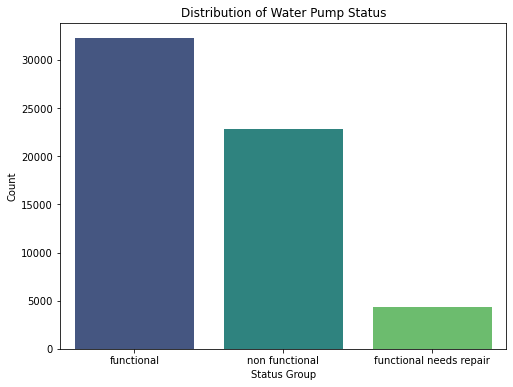

In [36]:
# Create a countplot to visualize the distribution of 'status_group'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='status_group', palette='viridis')
plt.title('Distribution of Water Pump Status')
plt.xlabel('Status Group')
plt.ylabel('Count')

plt.show()

The dependent variable, 'status_group' exhibits a notable class imbalance with 'functional needs repair' representing the minority class. We will need to be mindful of addressing this imbalance when developing the predictive model to ensure accurate and insightful predictions about water pump functionality.

In [182]:
import folium

# Create a map centered around the mean latitude and longitude
m = folium.Map(location=[df_copy['latitude'].mean(), df_copy['longitude'].mean()], zoom_start=6)

# Create color-coded groups for the legend
functional_group = folium.FeatureGroup(name='Functional')
non_functional_group = folium.FeatureGroup(name='Non-Functional')
other_group = folium.FeatureGroup(name='Other')

# Loop through the DataFrame to add markers for each data point
for index, row in df_copy.iterrows():
    # Define the marker color based on 'status_group'
    if row['status_group'] == 'functional':
        color = 'green'
        functional_group.add_child(
            folium.CircleMarker(
                location=[row['latitude'], row['longitude']],
                radius=2,
                color=color,
                fill=True,
                fill_color=color,
                fill_opacity=0.2,
            )
        )
    elif row['status_group'] == 'non functional':
        color = 'red'
        non_functional_group.add_child(
            folium.CircleMarker(
                location=[row['latitude'], row['longitude']],
                radius=2,
                color=color,
                fill=True,
                fill_color=color,
                fill_opacity=0.2,
            )
        )
    else:
        color = 'blue'  # Add more conditions if needed
        other_group.add_child(
            folium.CircleMarker(
                location=[row['latitude'], row['longitude']],
                radius=2,
                color=color,
                fill=True,
                fill_color=color,
                fill_opacity=0.2,
            )
        )

# Add the color-coded groups to the map
functional_group.add_to(m)
non_functional_group.add_to(m)
other_group.add_to(m)

# Add a legend to the map
folium.LayerControl().add_to(m)
                   
# Display the map
m

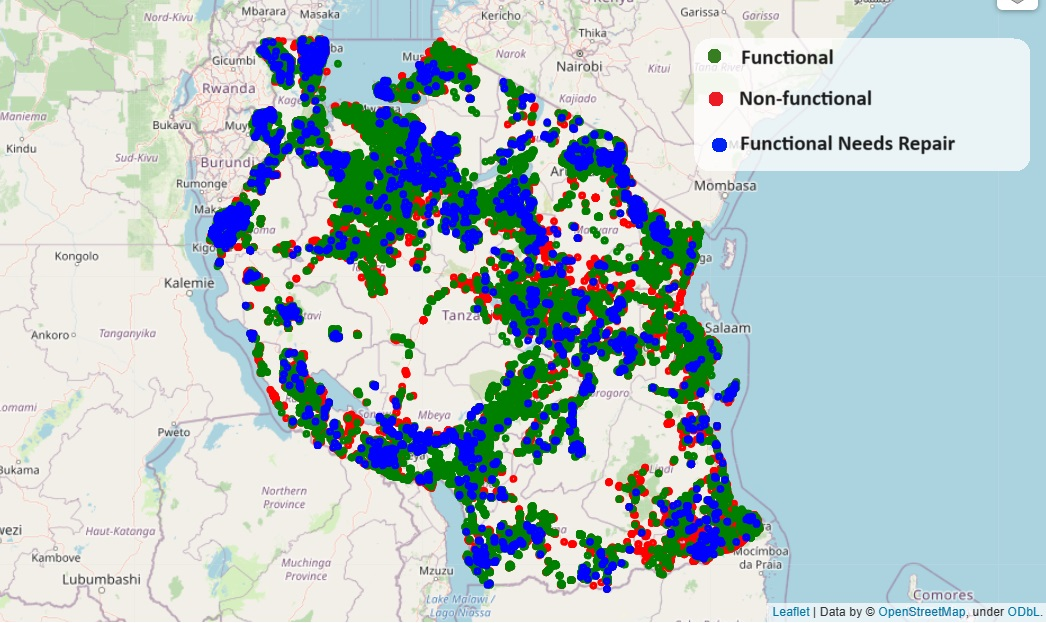

In [37]:
len(df_copy[df_copy['construction_year'] == 0])

19580

With 19,580 entries in the "construction_year" column registered as zeros, which accounts for approximately 35% of the data, simply removing these records would result in a significant loss of valuable information. To address this issue, we need to replace these zero values with synthetic ones, allowing us to retain the majority of our data. 

In [38]:
# Display descriptive statistics without zero values in 'construction_year'
df_copy.loc[df_copy['construction_year']!=0].describe()

,amount_tsh,gps_height,longitude,latitude,population,permit,construction_year
count,36764.000000,36764.000000,36764.000000,36764.000000,36764.000000,36764.000000,36764.000000
mean,471.365832,982.377190,36.014379,-6.358043,269.044391,0.717332,1996.886465
std,3072.639233,623.739194,2.609352,2.763057,542.758990,0.450302,12.452953
min,0.000000,-63.000000,29.607122,-11.649440,0.000000,0.000000,1960.000000
25%,0.000000,351.000000,34.671313,-8.855712,30.000000,0.000000,1987.000000
50%,0.000000,1117.000000,36.691627,-6.350535,150.000000,1.000000,2000.000000
75%,200.000000,1471.000000,37.895708,-3.728633,305.250000,1.000000,2008.000000
max,250000.000000,2770.000000,40.345193,-1.042375,30500.000000,1.000000,2013.000000


The descriptive statistics show that the majority of the recorded construction years fall within a range from 1960 to 2013, with a median value of 2000. Given this, we replace the zero values with the median year, 2000. Using the median as a replacement minimizes the potential impact of outliers and offers a reasonable approximation for missing construction years. 

In [39]:
# Replace the zero values with the median year, 2000
df_copy['construction_year'].replace(to_replace = 0, value = 2000, inplace=True)

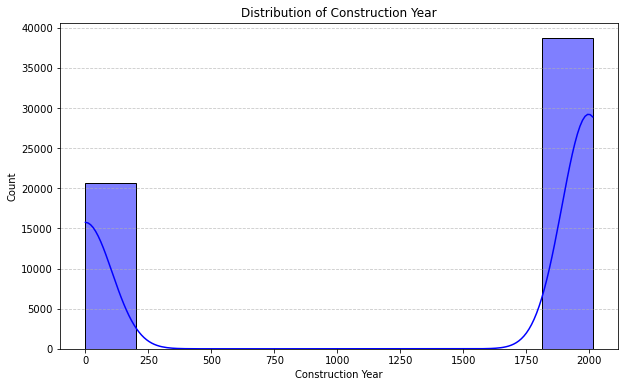

In [40]:
# Create a histogram for 'construction_year'
plt.figure(figsize=(10, 6))
sns.histplot(df['construction_year'], bins=10, kde=True, color='blue')
plt.title('Distribution of Construction Year')
plt.xlabel('Construction Year')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

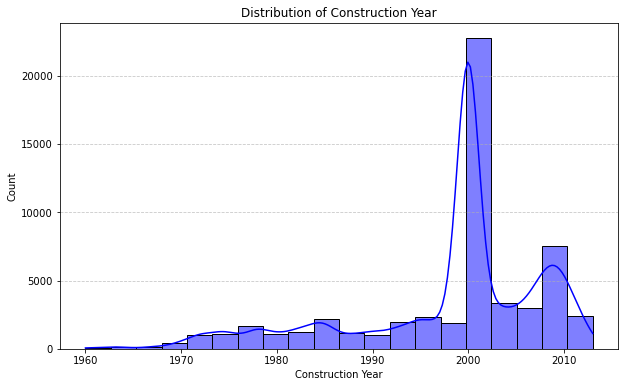

In [41]:
# Create a histogram for 'construction_year'
plt.figure(figsize=(10, 6))
sns.histplot(df_copy['construction_year'], bins=20, kde=True, color='blue')
plt.title('Distribution of Construction Year')
plt.xlabel('Construction Year')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Upon replacing the zero values with the median year of 2000, a noticeable improvement is observed in the distribution of the 'construction_year' data. The data is left-skewed, indicating that the majority of water pumps were constructed around the year 2000.

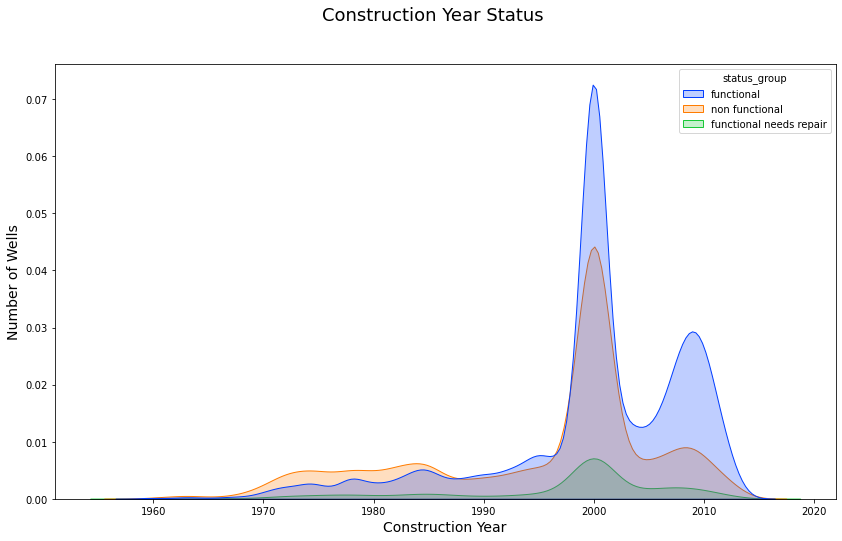

In [42]:
# Plot without waterpoints from year 1950
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.kdeplot(data=df_copy, x='construction_year', hue='status_group', palette='bright', fill=True)

# Title and axis labels
fig.suptitle('Construction Year Status', fontsize=18)
plt.xlabel("Construction Year", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)

plt.show()

We observe a correlation between the age of water pumps and their functionality. Older pumps, dating back to approximately 1960 to 1988, are more likely to be non-functional, while newer pumps built after 1988 tend to be functional. This trend remains consistent even after replacing the zero values with the median year, 2000. Notably, this imputation results in a surge of water points constructed in 2000, although the functional/non-functional trend remains unchanged. It will be interesting to assess the impact of this imputed data on our predictive model's performance.

In [43]:
# Calculate the IQR for longitude and latitude
Q1_longitude = df_copy['longitude'].quantile(0.25)
Q3_longitude = df_copy['longitude'].quantile(0.75)
IQR_longitude = Q3_longitude - Q1_longitude

# Define the lower and upper bounds for outliers
lower_bound_longitude = Q1_longitude - 1.5 * IQR_longitude
upper_bound_longitude = Q3_longitude + 1.5 * IQR_longitude

# Check for outliers
outliers_longitude = df_copy[(df_copy['longitude'] < lower_bound_longitude) | (df_copy['longitude'] > upper_bound_longitude)]

# Count outliers
num_outliers_longitude = len(outliers_longitude)

# Display the counts
print(f"Number of outliers in longitude: {num_outliers_longitude}")

Number of outliers in longitude: 1812


In [183]:
# Create a base map centered around the mean latitude and longitude
mean_lat = df_copy['latitude'].mean()
mean_lon = df_copy['longitude'].mean()
m = folium.Map(location=[mean_lat, mean_lon], zoom_start=4)

# Create a FastMarkerCluster for inliers
inliers_cluster = FastMarkerCluster(data=list(zip(df_copy['latitude'], df_copy['longitude'])), name='Inliers')
inliers_cluster.add_to(m)

# Create a FastMarkerCluster for longitude outliers
longitude_outliers_cluster = FastMarkerCluster(data=list(zip(outliers_longitude['latitude'], outliers_longitude['longitude'])), name='Longitude Outliers')
longitude_outliers_cluster.add_to(m)

# Add layer control for clusters
folium.LayerControl(collapsed=False).add_to(m)

# Display the map
m

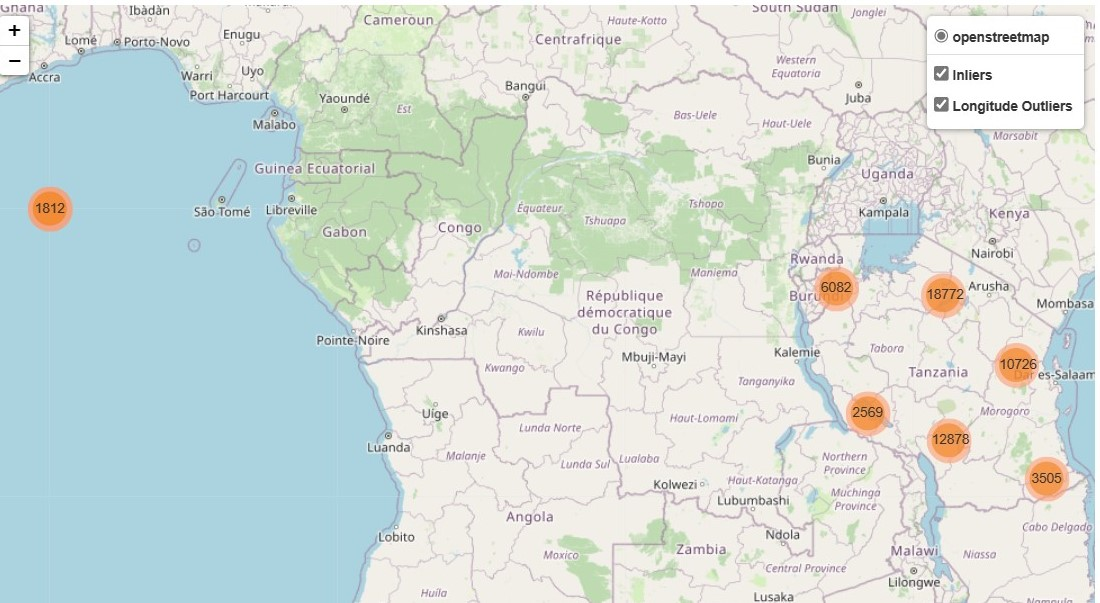

We have identified a significant number of outliers in the 'longitude' column, totaling 1812 data points. Upon visualizing their geographical locations on a map, it becomes apparent that these outliers are situated in the Atlantic Ocean, which is not a plausible location for water pumps in Tanzania. Given the unavailability of a reasonable method for imputing these data points, we make the decision to remove these rows from our dataset. By doing so, we ensure that our model is not influenced by erroneous geographic coordinates that could potentially lead to misleading predictions. 

In [45]:
# Drop rows with zero values in the 'longitude' column
df_copy = df_copy[df_copy['longitude'] != 0]

The __amount_tsh__ variable or [Total Static Head](http://www.ramueller.com/pump-handbook/centrifugal-pump-fundamentals-head/index.html#:~:text=TOTAL%20STATIC%20HEAD%20is%20the,in%20the%20pipe%20and%20fittings.) refers to the vertical measurement in feet that represents the distance between the source of a supply and the point where the liquid is freely discharged or reaches its free surface.

In [46]:
# Value counts for the "amount_tsh" column
df_copy['amount_tsh'].value_counts()

0.0        37199
500.0       3075
50.0        2340
1000.0      1445
20.0        1430
           ...  
38000.0        1
1400.0         1
8500.0         1
6300.0         1
26.0           1
Name: amount_tsh, Length: 95, dtype: int64

In [47]:
# Calculate "amount_tsh" entries as a percentage of the total
df_copy['amount_tsh'].value_counts()/df_copy['amount_tsh'].count()

0.0        0.682150
500.0      0.056389
50.0       0.042911
1000.0     0.026498
20.0       0.026223
             ...   
38000.0    0.000018
1400.0     0.000018
8500.0     0.000018
6300.0     0.000018
26.0       0.000018
Name: amount_tsh, Length: 95, dtype: float64

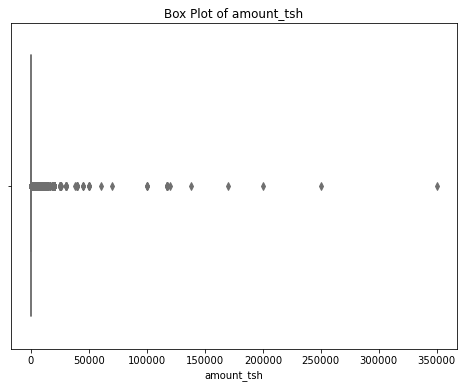

In [48]:
# Create a box plot to visualize the distribution and potential outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['amount_tsh'], color='skyblue')
plt.title('Box Plot of amount_tsh')
plt.xlabel('amount_tsh')

plt.show()

Our data contains 36,018 entries where total static head measurement is captured as zero. The preponderance of zero values (being 67.6% of the entries in this feature) appears to have lead to the compression of the visualization scale, causing non-zero values to be perceived as outliers because they fall outside the main concentration of zero values.

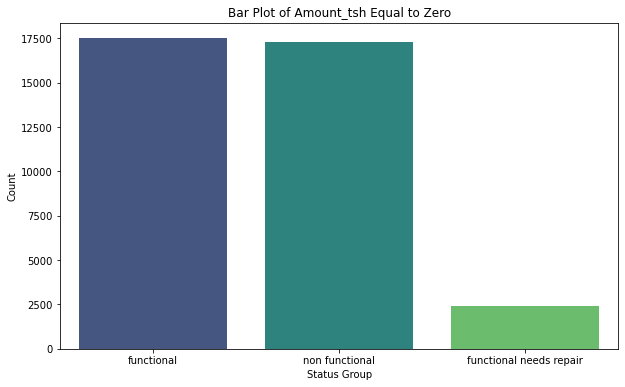

In [49]:
# Filter the DataFrame for 'amount_tsh' equal to 0
zero_tsh_df = df_copy[df_copy['amount_tsh'] == 0]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=zero_tsh_df, x='status_group', palette='viridis')
plt.title('Bar Plot of Amount_tsh Equal to Zero')
plt.xlabel('Status Group')
plt.ylabel('Count')

plt.show()

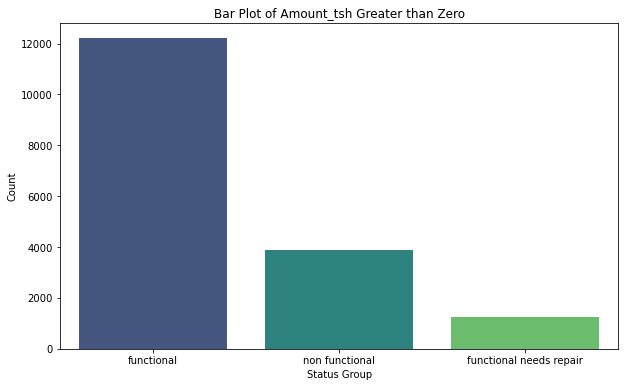

In [50]:
# Filter the DataFrame for 'amount_tsh' greater than 0
above0_tsh_df = df_copy[df_copy['amount_tsh'] > 0]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=above0_tsh_df, x='status_group', palette='viridis')
plt.title('Bar Plot of Amount_tsh Greater than Zero')
plt.xlabel('Status Group')
plt.ylabel('Count')

plt.show()

We note that zero total static head measurement can occur due to various factors, such as the absence of a water supply, pumping failures, measurement errors, dry seasons, system shutdowns, and data entry mistakes.

After visualizing the "amount_tsh," we find that it can potentially serve as a valuable predictor of water pump functionality. Notably, our observations indicate that when "amount_tsh" is zero, there is an almost equal likelihood of the pump being functional or non-functional. However, as the "amount_tsh" increases, there is a corresponding increase in the likelihood of pump functionality.

Given these insights, we have decided to retain the "amount_tsh" feature in its current form for our initial model testing. We will explore various machine learning models to evaluate its significance as a predictor for water pump functionality. This approach allows us to leverage the information captured by "amount_tsh" while considering its complex relationship with functionality.

In [51]:
# Value counts for the "population" column
df_copy['population'].value_counts()

0       18460
1        6126
150      1857
200      1824
250      1611
        ...  
1685        1
1960        1
2248        1
821         1
1439        1
Name: population, Length: 1029, dtype: int64

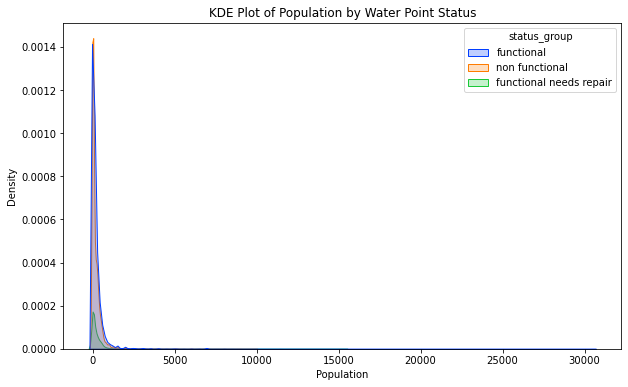

In [52]:
# Create a KDE plot of the "population" variable
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_copy, x="population", hue="status_group", palette="bright", fill=True)
plt.xlabel("Population")
plt.ylabel("Density")
plt.title("KDE Plot of Population by Water Point Status")

plt.show()

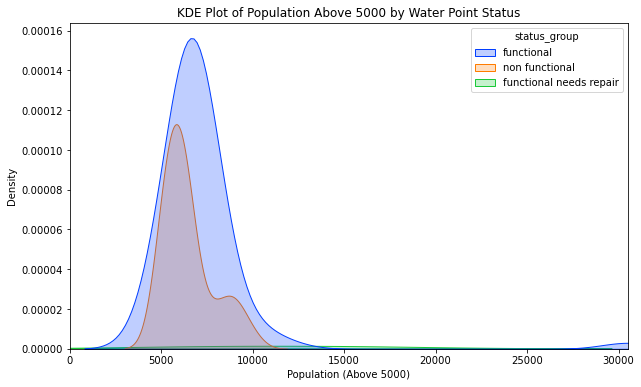

In [53]:
# Filter the DataFrame for population values above 5000
population_above_5000 = df_copy[df_copy['population'] > 5000]

# Create a KDE plot of the "population" variable
plt.figure(figsize=(10, 6))
sns.kdeplot(data=population_above_5000, x="population", hue="status_group", palette="bright", fill=True)
plt.xlabel("Population (Above 5000)")
plt.ylabel("Density")
plt.title("KDE Plot of Population Above 5000 by Water Point Status")

# Set the x-axis limits to start from 5000
plt.xlim(0, population_above_5000['population'].max())

plt.show()

Approximately 32.80% of the entries in the "population" feature are recorded as zeros, signifying that there are instances where no population is associated with certain water points. This may be due to unpopulated or remote areas.

Unsurprisingly, water points with zero recorded population tend to have a higher proportion of non-functional pumps compared to functional ones. Nevertheless, there is a noteworthy correlation between population and water point functionality. With the increase in population, we observe a rise in both functional and non-functional pumps, but the prevalence of functional pumps remains higher. Notably, the highest concentration of water points is found in areas with approximately 7,000 people. Beyond this point, as the population further increases, the number of water points decreases, although functional pumps continue to outnumber non-functional ones.

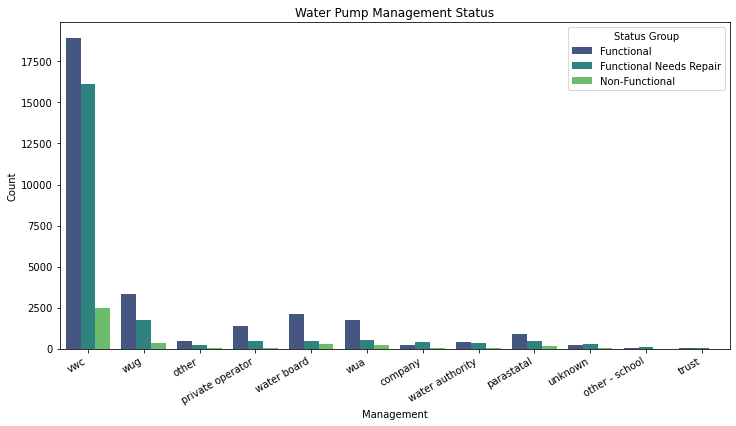

In [54]:
# Create a countplot for 'management'
plt.figure(figsize=(12, 6))
sns.countplot(data=df_copy, x='management', hue='status_group', palette='viridis')
plt.xticks(rotation=30, horizontalalignment='right')
plt.title('Water Pump Management Status')
plt.xlabel('Management')
plt.ylabel('Count')sns.set_style("white")

plt.legend(title='Status Group', loc='upper right', labels=['Functional', 'Functional Needs Repair', 'Non-Functional'])
plt.show()

The management of water wells in Tanzania is predominantly carried out by VWC, with a significant number of water points in each status group. Around 19,000 of these wells are functional, while approximately 16,000 require repair, and fewer than 2,500 are non-functional. Second in the management of significantly fewer water wells is WUG, overseeing around 4,000 functional wells, approximately 2,000 in need of repair, and just under 1,000 non-functional. Interestingly, categories such as 'other,' 'private operator,' 'company,' 'water authority,' 'unknown,' 'other-school,' and 'trust' exhibit a notably low number of non-functional water wells.

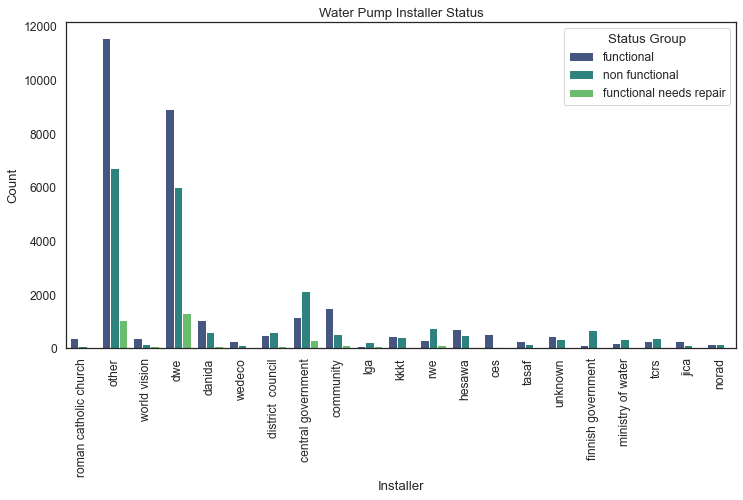

In [186]:
# Create a countplot for 'installer'
plt.figure(figsize=(12, 6))
sns.countplot(data=df_copy, x='installer', hue='status_group', palette='viridis')
plt.xticks(rotation=90)
plt.title('Water Pump Installer Status')
plt.xlabel('Installer')
plt.ylabel('Count')
plt.legend(title='Status Group')

plt.show()

The Department of Water and Sanitation (DWE) emerges as a prominent installer, responsible for a substantial number of water pumps in Tanzania. While they have successfully installed a considerable 8,911 functional pumps, it is equally concerning that 6,016 of their installations currently remain non-functional. On the other hand, the Central Government exhibits a contrasting trend, as it has more non-functional pumps (2,130) than functional ones (1,182). This may indicate a lapse in terms of maintenance strategies by the organizations involved.

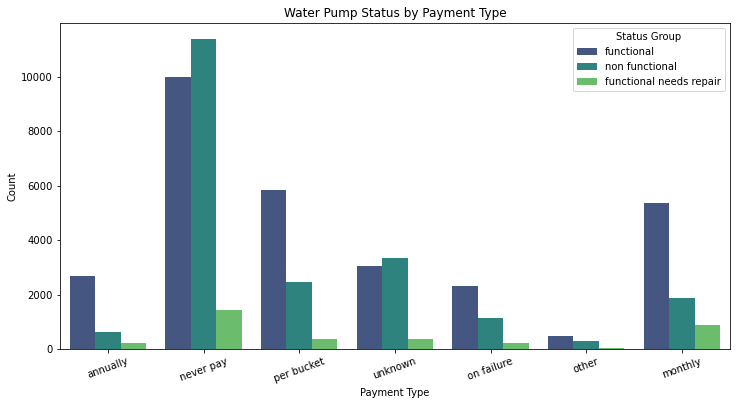

In [55]:
# Create a countplot for 'payment_type'
plt.figure(figsize=(12, 6))
sns.countplot(data=df_copy, x='payment_type', hue='status_group', palette='viridis')
plt.xticks(rotation=20)
plt.title('Water Pump Status by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.legend(title='Status Group')

plt.show()

"Never pay" water pumps appear to be the most prevelant type in Tanzania and have a higher number of non-functioning water points compared to functioning ones. Conversely, within categories that involve payments, we observe a positive correlation between the presence of payment and water point functionality since the majority of water pumps in these payment-related categories are functional.

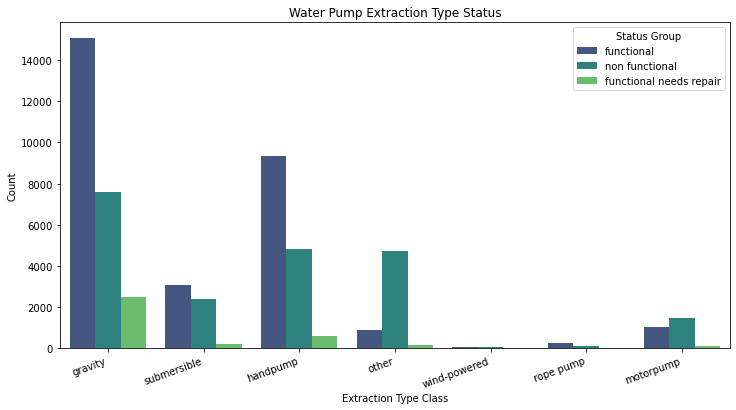

In [56]:
# Create a countplot for 'extraction_type_class'
plt.figure(figsize=(12, 6))
sns.countplot(data=df_copy, x='extraction_type_class', hue='status_group', palette='viridis')
plt.xticks(rotation=20, ha="right")
plt.title("Water Pump Extraction Type Status")
plt.xlabel("Extraction Type Class")
plt.ylabel("Count")
plt.legend(title="Status Group")

plt.show()

The predominant extraction method for water pumps in Tanzania is gravity, with the majority of them functioning well (around 16,000). Interestingly, we observe that they also have the highest number of non-functional pumps. The second most common extraction method is hand pumps, accounting for slightly over 10,000 functioning pumps. However, among the non-functional pumps, those categorized as "other" extraction methods and hand pumps rank second and third, each having just over 5,000 non-functional pumps.

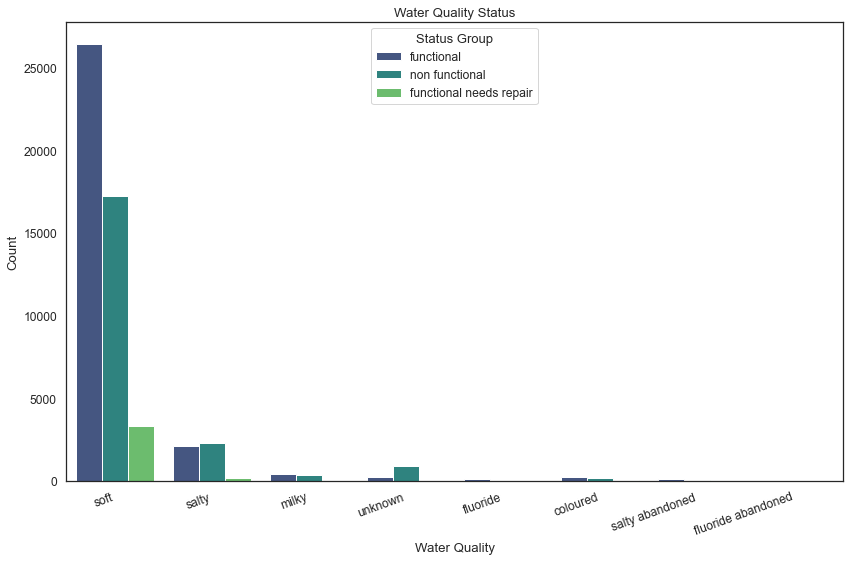

In [108]:
# Create a countplot for 'water_quality'
plt.figure(figsize=(12, 8))
sns.set_style("white")
sns.countplot(data=df_copy, x='water_quality', hue='status_group', palette='viridis')
plt.xticks(rotation=20, ha="right")
plt.title("Water Quality Status")
plt.xlabel("Water Quality")
plt.ylabel("Count")
plt.legend(title="Status Group", title_fontsize='13')
plt.tight_layout()

plt.show()

The predominant water quality at most water points is soft water, with approximately 27,000 functional wells, around 17,000 non-functional wells, and approximately 4,000 functional wells in need of repair falling into this category. Saltwater wells, while significantly less common, rank as the second most prevalent water quality type. However, it's worth noting that most of these saltwater wells are non-functional, numbering just under 3,000, while about 2,500 remain functional.

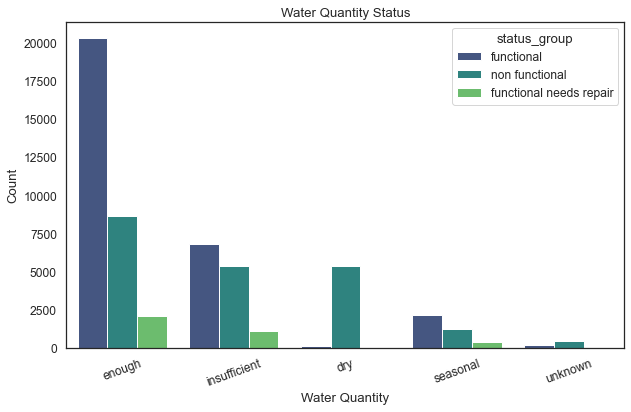

In [109]:
# Create a countplot for 'quantity'
plt.figure(figsize=(10, 6))
sns.countplot(data=df_copy, x='quantity', hue='status_group', palette='viridis')
plt.title('Water Quantity Status')
plt.xticks(rotation=20)
plt.xlabel('Water Quantity')
plt.ylabel('Count')

plt.show()

As expected, dry water points are primarily non-functional, totaling approximately 6,000, with fewer than 1,000 in functional condition. Notably, there is a positive correlation between water availability and water pump functionality. In regions with sufficient water, the majority of pumps are functional, exceeding 20,000 in count. However, as water availability decreases, the count of functional pumps also decreases, with approximately 8,000 in regions with insufficient water and roughly 2,500 in areas where availability of water is seasonal. This trend is consistent across different pump statuses.

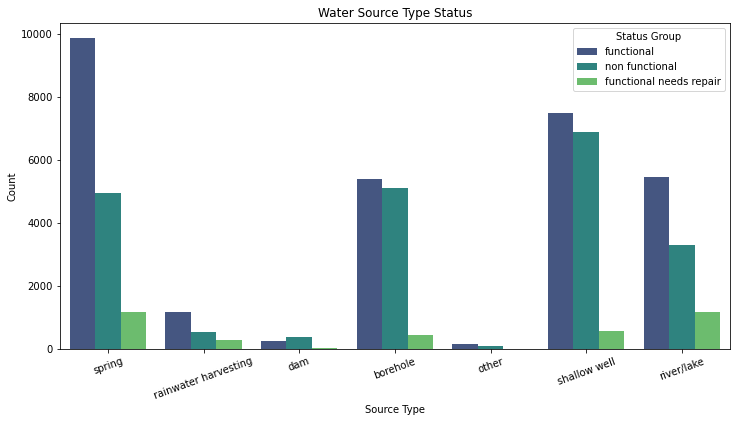

In [59]:
# Create a countplot for 'source_type'
plt.figure(figsize=(12, 6))
sns.countplot(data=df_copy, x='source_type', hue='status_group', palette='viridis')
plt.xticks(rotation=20)
plt.title('Water Source Type Status')
plt.xlabel('Source Type')
plt.ylabel('Count')
plt.legend(title='Status Group')

plt.show()

With the exception of dams, all other water sources exhibit a trend where functional pumps outnumber non-functional ones. Springs, as the water source, boast the highest functionality with almost 10,000 operational pumps, followed closely by shallow wells with slightly over 8,000. Conversely, water points supplied by dams are the least functional, numbering less than 500. When considering non-functional pumps, water points deriving from shallow wells have the highest count, just over 7,000, followed by boreholes at approximately 5,000. Pumps drawing water from sources classified as 'other' have the lowest non-functional pumps, approximately 200 in total.

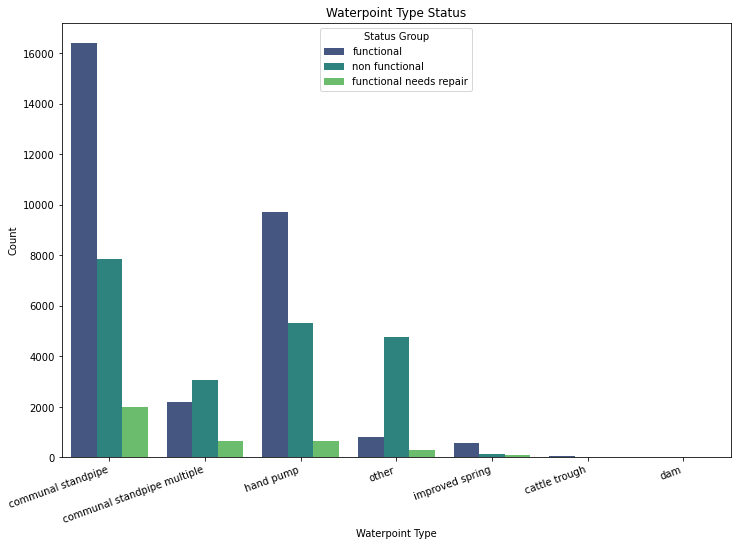

In [60]:
# Create a countplot for 'waterpoint_type'
plt.figure(figsize=(12, 8))
sns.countplot(data=df_copy, x='waterpoint_type', hue='status_group', palette='viridis')
plt.title('Waterpoint Type Status')
plt.xticks(rotation=20, ha='right')
plt.xlabel('Waterpoint Type')
plt.ylabel('Count')
plt.legend(title='Status Group')

plt.show()

Analysis of waterpoint types in Tanzania reveals that "communal standpipe" is the most common choice, serving over 17,500 functional waterpoints. However, it also exhibits the highest non-functionality, with more than 8,000 non-operational points. "hand pump" follows as the second most common type, indicating its widespread use and the need for maintenance in approximately 6,000 cases. Less common options like "communal standpipe multiple," "improved spring," and "cattle trough" suggest limited adoption.

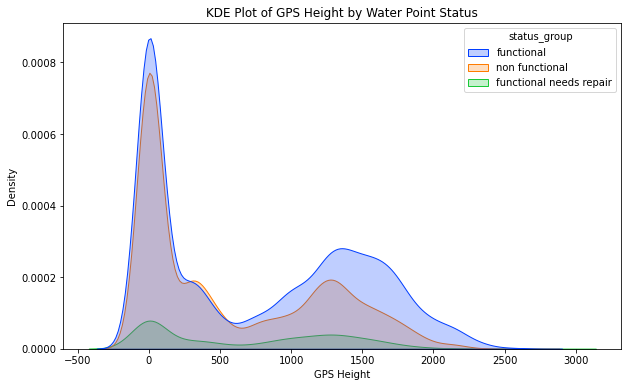

In [61]:
# Create a KDE plot of the "gps_height" variable
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_copy, x="gps_height", hue="status_group", palette="bright", fill=True)
plt.xlabel("GPS Height")
plt.ylabel("Density")
plt.title("KDE Plot of GPS Height by Water Point Status")

plt.show()

We observe a high density of functional and non-functional wells concentrated in regions with altitudes below 250. In the range of 250 to 500 GPS height, non-functional wells slightly outnumber functional ones. 
When we examine altitudes exceeding 500, functional wells become more prevalent compared to non-functional ones.

In [62]:
population_per_region = df_copy.groupby('region')['population'].sum().reset_index().sort_values(by='population', ascending=False).head(10)
population_per_region

,region,population
5,kigoma,1408681
11,morogoro,1060090
14,pwani,920896
9,mara,820774
0,arusha,718172
15,rukwa,661359
20,tanga,628482
7,lindi,563370
16,ruvuma,525350
8,manyara,503043


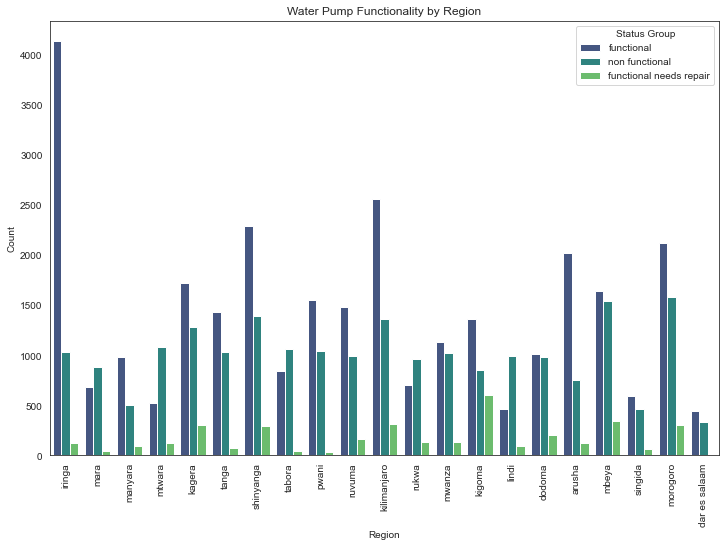

In [63]:
# Create a countplot for 'region'
plt.figure(figsize=(12, 8))
sns.set_style("white")
sns.countplot(data=df_copy, x='region', hue='status_group', palette='viridis')
plt.xticks(rotation=90)
plt.title('Water Pump Functionality by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Status Group')

plt.show()

In analyzing the status of water pumps across different regions, it's evident that some regions in Tanzania have a substantial number of functional water pumps.  Iringa takes the lead in this regard, boasting an impressive 4,138 functional pumps, while Kilimanjaro, Morogoro, and Arusha follow closely with 2,562, 2,119, and 2,025 functional pumps, respectively.

Conversely, the analysis reveals regions facing significant challenges with non-functional water pumps. Morogoro grapples with the most substantial issue, reporting 1,587 non-functional pumps, followed closely by Mbeya with 1,547 and Shinyanga with 1,365 non-functional pumps. Kagera also presents a noteworthy concern with 1,285 non-functional pumps. Regions such as Morogoro, with the second largest population around its water points (1,060,090 persons), and Mbeya, also with a substantial population, particularly require immediate attention and maintenance efforts to reestablish access to clean and reliable water sources for their communities.

In [66]:
basin_status_group = df.groupby(['basin', 'status_group']).size().unstack().sort_values(by='functional', ascending=False)
basin_status_group

status_group,functional,functional needs repair,non functional
basin,,,
Pangani,5372,477,3091
Lake Victoria,5100,989,4159
Rufiji,5068,437,2471
Internal,4482,557,2746
Lake Nyasa,3324,250,1511
Wami / Ruvu,3136,269,2582
Lake Tanganyika,3107,742,2583
Ruvuma / Southern Coast,1670,326,2497
Lake Rukwa,1000,270,1184


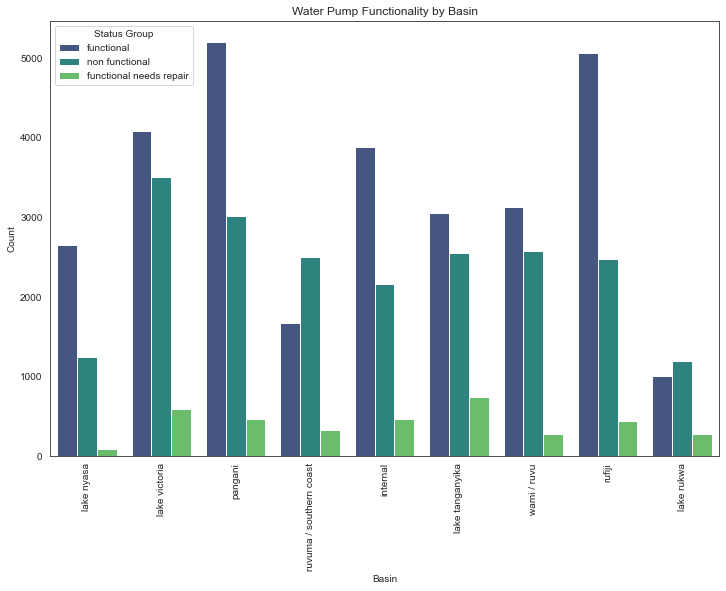

In [64]:
# Create a countplot for 'basin'
plt.figure(figsize=(12, 8))
sns.set_style("white")
sns.countplot(data=df_copy, x='basin', hue='status_group', palette='viridis')
plt.xticks(rotation=90)
plt.title('Water Pump Functionality by Basin')
plt.xlabel('Basin')
plt.ylabel('Count')
plt.legend(title='Status Group')

plt.show()

In analyzing the status of water points within different water basins, it's evident that some basins in Tanzania have a substantial number of functional water points, with Pangani, Lake Victoria, and Rufiji showcasing the highest counts of functional water points. Lake Victoria, in particular, stands out as a basin with an impressive number of functional water points, indicating a relatively robust water infrastructure although a significant number are in need of repair. The same is evident for the Pangani water basin.

It's also notable that several basins, such as Lake Rukwa, face a significant number of non-functional water points (almost 50%), underscoring the need for urgent attention and maintenance efforts to ensure access to clean and reliable water sources for the communities in these areas. The status of water points in the different basins highlights the disparities and challenges faced by various regions in maintaining their water infrastructure

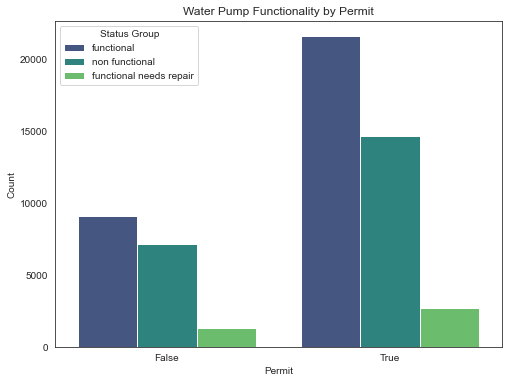

In [65]:
# Create a countplot for 'permit'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='permit', hue='status_group', palette='viridis')
plt.title('Water Pump Functionality by Permit')
plt.xlabel('Permit')
plt.ylabel('Count')
plt.legend(title='Status Group')

plt.show()

In evaluating the status of water points based on their permit status, it is apparent that the presence of permits plays a significant role in ensuring the functionality of water points. In cases where a permit is present (True), there are notably more functional water points, with 21,541 in good working condition. However, even with permits, some water points still require repair (2,697) or are non-functional (14,614). On the other hand, when permits are absent (False), the number of functional water points significantly decreases to 9,045, and the proportion of water points in need of repair (1,320) or non-functional (7,127) is higher. This suggests that obtaining permits for water points can contribute to better functionality, but it does not guarantee that all water points will remain operational. 

### Feature Correlation

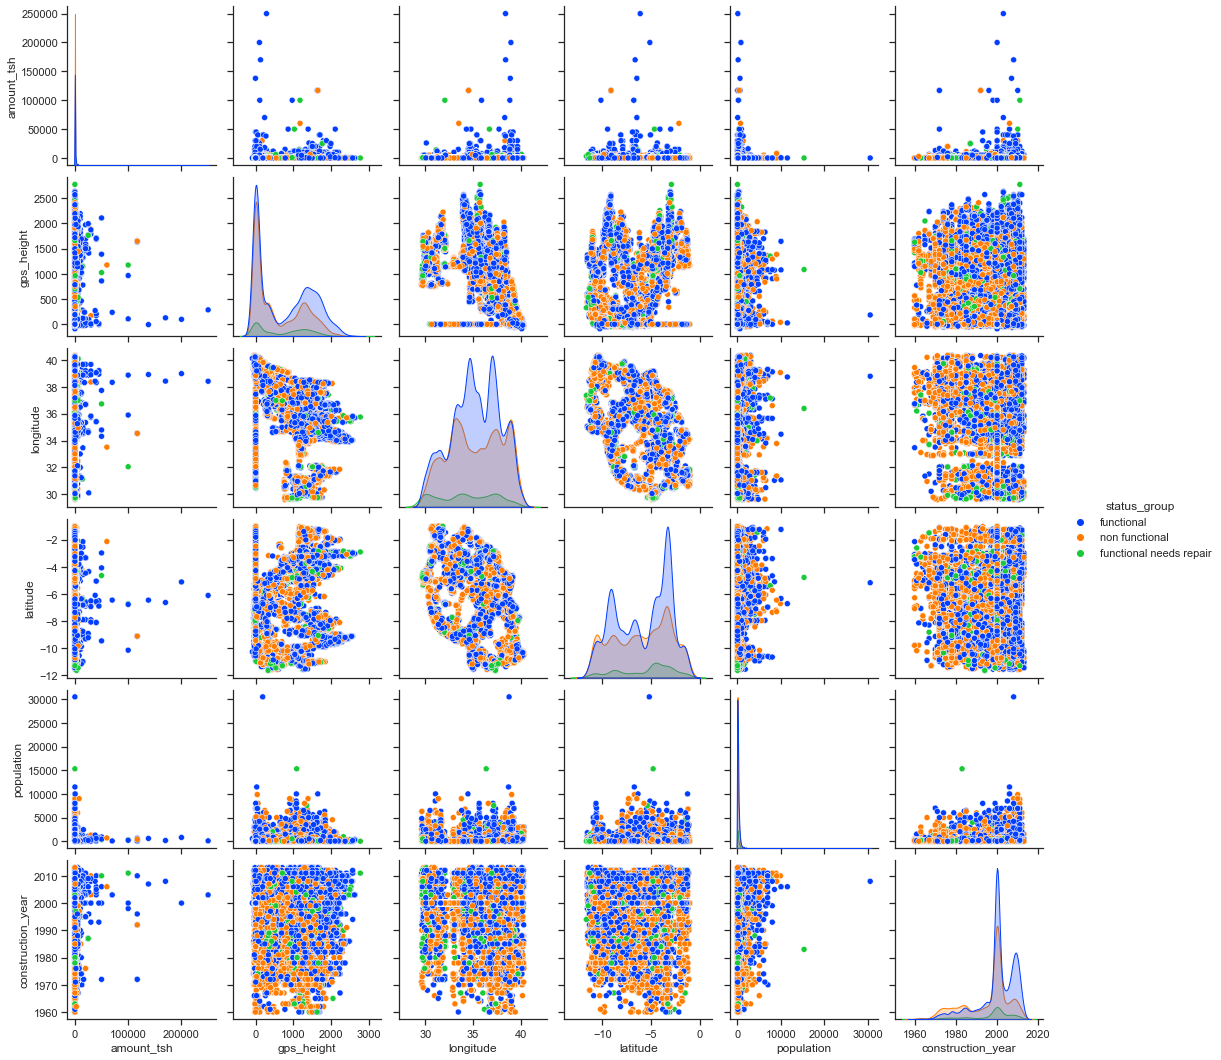

In [67]:
# Select the numeric columns for the scatter plot
numeric_columns = df_copy.select_dtypes(include=['float64', 'int64'])

# Create scatter plots for all combinations of numeric columns
sns.set(style="ticks")
sns.pairplot(df_copy, hue='status_group', vars=numeric_columns, palette='bright')

plt.show()

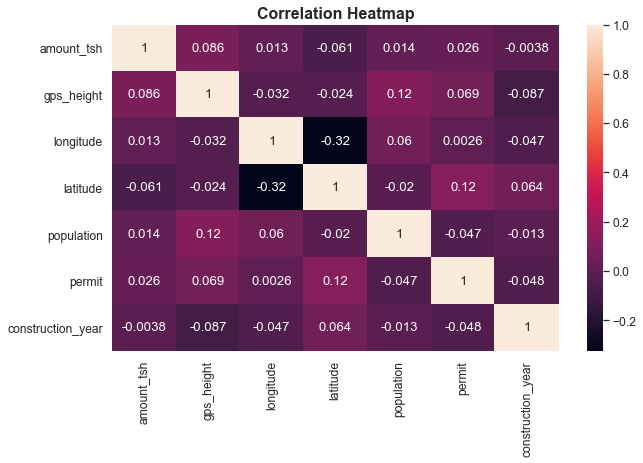

In [69]:
# Plot the correlation between the numeric features
sns.set(font_scale=1.1)
plt.figure(figsize=(10, 6))
sns.heatmap(df_copy.corr(), annot=True)
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')

plt.show()

Overall, most of the correlations in the matrix are relatively weak, suggesting that there are no strong linear relationships between these numeric features. This means the features are not strongly dependent on each other therefore we do not expect multicollinearity to be a significant issue when we begin bulding the predictive models.


### Convert Categorical Data

In [73]:
# Create lists of categorical, continuous, and binary columns
cat_col = ['installer', 'basin', 'region', 'extraction_type_class', 'management',
          'payment_type', 'water_quality', 'quantity', 'source_type', 'waterpoint_type']

In [74]:
#Create dummies
dummy_df = pd.get_dummies(df_copy,columns=cat_col)
dummy_df

,status_group,amount_tsh,gps_height,longitude,latitude,population,permit,construction_year,installer_central government,installer_ces,...,source_type_river/lake,source_type_shallow well,source_type_spring,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
0,functional,6000.0,1390,34.938093,-9.856322,109,0,1999,0,0,...,0,0,1,0,1,0,0,0,0,0
1,functional,0.0,1399,34.698766,-2.147466,280,1,2010,0,0,...,0,0,0,0,1,0,0,0,0,0
2,functional,25.0,686,37.460664,-3.821329,250,1,2009,0,0,...,0,0,0,0,0,1,0,0,0,0
3,non functional,0.0,263,38.486161,-11.155298,58,1,1986,0,0,...,0,0,0,0,0,1,0,0,0,0
4,functional,0.0,0,31.130847,-1.825359,0,1,2000,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,functional,10.0,1210,37.169807,-3.253847,125,1,1999,0,1,...,0,0,1,0,1,0,0,0,0,0
59396,functional,4700.0,1212,35.249991,-9.070629,56,1,1996,0,0,...,1,0,0,0,1,0,0,0,0,0
59397,functional,0.0,0,34.017087,-8.750434,0,0,2000,0,0,...,0,0,0,0,0,0,0,1,0,0
59398,functional,0.0,0,35.861315,-6.378573,0,1,2000,0,0,...,0,1,0,0,0,0,0,1,0,0


# Modeling

Machine learning is the chosen approach for this project because of its capacity to handle the intricate nature of the data effectively, aligning with the project's objectives. Machine learning models offer the advantage of accurately categorizing water pump conditions, ultimately enhancing safe and reliable water accessibility in Tanzania.

However, it's essential to acknowledge the risk associated with machine learning models. Proper parameter tuning is critical to prevent the risk of reduced sensitivity, which could hinder the model's effectiveness in identifying positive cases. This, in turn, may limit its utility in supporting the NGO's mission to enhance clean water access. Careful parameter tuning is crucial to mitigate this risk.

F1 score is used as the performance metric, benefiting the project by considering both precision and recall, thus balancing the model's ability to correctly classify pump functionality. 

The following models are tested to identify the best classifier:
1. __Logistic Regression__
2. __Decision Tree Classifier__
3. __K Nearest Neighbor__
4. __Random Forest Classifier__
5. __eXtreme Gradient Boosting (XGBoost)__
6. __eXtreme Gradient Boosting (XGBoost) with SMOTE__

__GridSearchCV__ is used for hyperparameter tuning. The technique efficiently identifies the best hyperparameter combination for a model while performing cross-validation to ensure optimal model performance.

### Train Test Split

The data is divided into training and testing subsets, allocating 80% for training and reserving 20% for testing. To ensure reproducibility, a fixed random state of 42 is maintained.

In [75]:
# Split the data into training and test sets
y = dummy_df['status_group']
X = dummy_df.drop(['status_group'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [76]:
# Display descriptive statistics
X_train.describe()

,amount_tsh,gps_height,longitude,latitude,population,permit,construction_year,installer_central government,installer_ces,installer_community,...,source_type_river/lake,source_type_shallow well,source_type_spring,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
count,43625.000000,43625.000000,43625.000000,43625.000000,43625.000000,43625.000000,43625.000000,43625.000000,43625.000000,43625.000000,...,43625.000000,43625.000000,43625.000000,43625.000000,43625.000000,43625.000000,43625.000000,43625.000000,43625.000000,43625.000000
mean,339.250279,678.530636,35.174722,-5.891880,184.384711,0.699553,1997.884516,0.066430,0.011095,0.040046,...,0.181547,0.273903,0.292883,0.001673,0.480688,0.109456,0.000092,0.287335,0.014350,0.106407
std,2867.202787,691.005210,2.660664,2.812606,441.993096,0.458458,10.348685,0.249035,0.104746,0.196069,...,0.385475,0.445965,0.455090,0.040873,0.499633,0.312214,0.009575,0.452524,0.118928,0.308361
min,0.000000,-90.000000,29.607122,-11.648378,0.000000,0.000000,1960.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.182506,-8.569957,0.000000,0.000000,1995.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,396.000000,35.188411,-5.263071,40.000000,1.000000,2000.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.000000,1316.000000,37.329657,-3.365331,234.000000,1.000000,2005.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,250000.000000,2770.000000,40.345193,-0.998464,15300.000000,1.000000,2013.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The summary of the features in X_train shows that these features have different scales, which can impact the performance of machine learning models.To address the issue of varying scales, we can use feature scaling techniques like standardization (z-score normalization), which transforms the features to have a mean of 0 and a standard deviation of 1. 

### Model Performance Statistics

In [91]:
def model_score(model, y_true, y_pred):
    print(classification_report(y_true, y_pred))
    print("Overall accuracy score", accuracy_score(y_true, y_pred))
    print("Overall precision score", precision_score(y_true, y_pred, average='weighted'))
    print("Overall recall score", recall_score(y_true, y_pred, average='weighted'))
    print("Overall F1-score", f1_score(y_true, y_pred, average='weighted'))
    
    # Define custom class labels
    custom_labels = ['func', 'needs repair', 'non-func']
    
    # Confusion matrix
    cnf_matrix = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=custom_labels)
    disp.plot()  # Specify a colormap for better visualization
    plt.grid(False)  # Remove gridlines
    plt.show()

## Logistic Regression Baseline Model

                         precision    recall  f1-score   support

             functional       0.72      0.90      0.80      5904
functional needs repair       0.34      0.04      0.07       698
         non functional       0.79      0.64      0.71      4305

               accuracy                           0.74     10907
              macro avg       0.62      0.53      0.53     10907
           weighted avg       0.73      0.74      0.72     10907

Overall accuracy score 0.7419088658659576
Overall precision score 0.725549679520312
Overall recall score 0.7419088658659576
Overall F1-score 0.7178433960499955


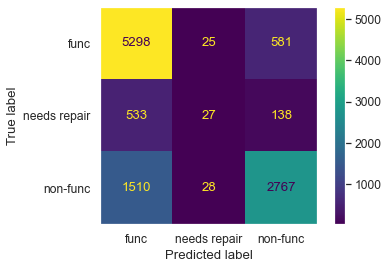

Training Accuracy: 74.25%
Validation accuracy: 74.19%


In [92]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('classifier', LogisticRegression(random_state=42))
])

# Fit the pipeline to your training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Use the model_score function to print performance statistics and display the confusion matrix
model_score(pipeline.named_steps['classifier'], y_test, y_pred)

# Predict on training and test sets
training_pred = pipeline.predict(X_train)
y_pred = pipeline.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

The __model achieves an accuracy of 74.19%__ on the validation dataset, indicating  that the model correctly predicts the class of water points in the validation dataset about 74.19% of the time.

The precision scores for the three classes vary with __the "functional needs repair" class precision being notably low at 34%__, suggesting that predictions in this category are less reliable. 

The recall scores for the classes also vary. The __"functional" class recall is relatively high at 90%__, indicating that the model successfully identifies a significant portion of "functional" instances. However, the __recall for the "functional needs repair" class is very low at 4%__, indicating that the model misses the majority of instances in this category. The __"non-functional" class recall is moderate at 64%__.

The __weighted average F1-score of 0.7178__ indicates a moderate balance between precision and recall.

The __training accuracy for the logistic regression model is 74.25%__, which is close to the validation accuracy. This suggests that the model does not exhibit significant overfitting.


## Logistic Regression with Hyperparameter Tuning

Fitting 5 folds for each of 15 candidates, totalling 75 fits
                         precision    recall  f1-score   support

             functional       0.72      0.90      0.80      5904
functional needs repair       0.34      0.04      0.06       698
         non functional       0.79      0.64      0.71      4305

               accuracy                           0.74     10907
              macro avg       0.62      0.53      0.52     10907
           weighted avg       0.73      0.74      0.72     10907

Overall accuracy score 0.7417254973869992
Overall precision score 0.7253824540411512
Overall recall score 0.7417254973869992
Overall F1-score 0.7172967568756476


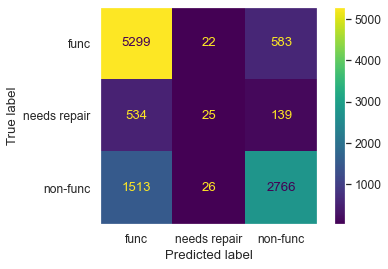

Training Accuracy: 74.26%
Validation accuracy: 74.17%


In [95]:
# Define hyperparameters to tune
param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__max_iter': [100, 200, 300],  
}

# Create GridSearchCV object
grid_search_lr = GridSearchCV(pipeline, param_grid_lr, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the pipeline to your training data with cross-validation and hyperparameter tuning
grid_search_lr.fit(X_train, y_train)

# Get the best estimator from the grid search
best_estimator_lr = grid_search_lr.best_estimator_

# Make predictions on the test data
y_pred_lr = best_estimator_lr.predict(X_test)

# Use the model_score function to print performance statistics and display the confusion matrix
model_score(best_estimator_lr.named_steps['classifier'], y_test, y_pred_lr)

# Predict on training and test sets
training_pred_lr = best_estimator_lr.predict(X_train)
y_pred_lr = best_estimator_lr.predict(X_test)

# Accuracy of training and test sets
training_accuracy_lr = accuracy_score(y_train, training_pred_lr)
test_accuracy_lr = accuracy_score(y_test, y_pred_lr)

print('Training Accuracy: {:.4}%'.format(training_accuracy_lr * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy_lr * 100))

The logistic regression model with hyperparameter tuning demonstrates performance similar to the baseline logistic regression model. __The logistic regression model with hyperparameter tuning achieves an accuracy of 74.17% on the validation dataset__, which is very close to the baseline model's accuracy of 74.19% suggesting that the tuned model maintains a similar level of predictive accuracy.

__The precision scores for the three classes are almost identical to those of the baseline model__. Similarly, the recall scores for the classes do not show significant changes from the baseline model. 

The __weighted average F1-score for the tuned model is 0.7173__, which is very close to the baseline model's F1-score of 0.7178. This suggests that the tuned model does not exhibit substantial improvements in balancing precision and recall.

The __training accuracy for the logistic regression model with hyperparameter tuning is 74.26%__, which is very similar to the training accuracy of the baseline model. This indicates that both models do not exhibit significant overfitting, but they also do not show substantial improvement on the validation dataset.

## Decision Tree Baseline Model

                         precision    recall  f1-score   support

             functional       0.80      0.80      0.80      5904
functional needs repair       0.34      0.36      0.35       698
         non functional       0.77      0.76      0.77      4305

               accuracy                           0.76     10907
              macro avg       0.64      0.64      0.64     10907
           weighted avg       0.76      0.76      0.76     10907

Overall accuracy score 0.7567617126615934
Overall precision score 0.7584582930674482
Overall recall score 0.7567617126615934
Overall F1-score 0.7575840725325452


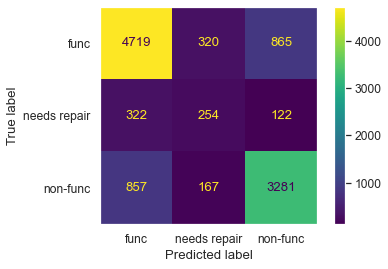

Training Accuracy: 100.0%
Validation accuracy: 75.68%


In [96]:
# Define the pipeline
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Fit the pipeline to your training data
pipeline_dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = pipeline_dt.predict(X_test)

# Print classification report and other metrics
model_score(pipeline_dt.named_steps['classifier'], y_test, y_pred_dt)

# Predict on training and test sets
training_pred1 = pipeline_dt.predict(X_train)
y_pred_dt = pipeline_dt.predict(X_test)

# Accuracy of training and test sets
training_accuracy1 = accuracy_score(y_train, training_pred1)
test_accuracy1 = accuracy_score(y_test, y_pred_dt)

print('Training Accuracy: {:.4}%'.format(training_accuracy1 * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy1 * 100))

The __baseline decision tree model achieves an accuracy of 75.68%__ on the validation dataset which indicates that the model correctly predicts the class of water points in the validation dataset approximately 75.68% of the time; an improvement on the logistic regression model.

The precision scores for the three classes vary with the model indicating __good precision for the "functional" and "non-functional" classes with scores of 80% and 77% respectively__. However, the __"functional needs repair" class precision is relatively low at 34%__, suggesting that predictions in this category are less reliable. 

The recall scores for the classes are relatively balanced. The __"functional" class recall is 80% and the "non-functional" class recall is 76%__, suggesting that the model successfully identifies a significant portion of "functional" and "non-functional" instances. The __"functional needs repair" class recall is 36%__, indicating some ability to detect instances in this category.

The __weighted average F1-score of 0.7576__ indicates a reasonable balance between precision and recall across all classes.

The __training accuracy for the decision tree model is notably high at 100.0%__ which may pose a challenge in the model's ability to make predictions on unseen data. Additionally, the difference between training and validation accuracy is a strong indicator of overfitting.


## Decision Tree Models with Hyperparameter Tuning

                         precision    recall  f1-score   support

             functional       0.77      0.87      0.82      5904
functional needs repair       0.40      0.28      0.33       698
         non functional       0.81      0.71      0.76      4305

               accuracy                           0.77     10907
              macro avg       0.66      0.62      0.63     10907
           weighted avg       0.76      0.77      0.76     10907

Overall accuracy score 0.7684972953149354
Overall precision score 0.7631640097829473
Overall recall score 0.7684972953149354
Overall F1-score 0.7625406466518243


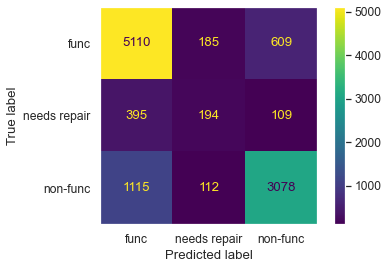

Training Accuracy: 87.21%
Validation Accuracy: 76.85%


In [97]:
# Define hyperparameters to tune
param_grid_model1 = {
    'classifier__max_depth': [None, 10, 20, 30], 
    'classifier__min_samples_split': [2, 5, 10], 
}

# Create GridSearchCV object
grid_search_model1 = GridSearchCV(pipeline_dt, param_grid_model1, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the pipeline to your training data with cross-validation
grid_search_model1.fit(X_train, y_train)

# Get the best estimator from the grid search
best_estimator_model1 = grid_search_model1.best_estimator_

# Make predictions on the test data
y_pred_dt_model1 = best_estimator_model1.predict(X_test)

# Print classification report and other metrics
model_score(best_estimator_model1.named_steps['classifier'], y_test, y_pred_dt_model1)

# Calculate training and validation accuracy
training_accuracy_model1 = grid_search_model1.score(X_train, y_train)
validation_accuracy_model1 = grid_search_model1.score(X_test, y_test)

print('Training Accuracy: {:.4}%'.format(training_accuracy_model1 * 100))
print('Validation Accuracy: {:.4}%'.format(validation_accuracy_model1 * 100))

The __decision tree model with hyperparameter tuning enhances perdictive accuracy as it achieves an accuracy of 76.85% on the validation dataset__, which is an improvement over the baseline model's accuracy of 75.68%. 

The precision scores for the three classes show improvement in the tuned model. __Notably, the "functional needs repair" class precision has increased to 40%__, indicating better precision for this class. 

The recall scores for the classes are also improved in the tuned model. The __"functional" class recall is now 87% while the "non-functional" class recall is 71%__, suggesting a higher ability to identify "functional" and "non-functional" instances. The __"functional needs repair" class recall is 28%__, which remains a challenge, but it's slightly improved. 

The __weighted average F1-score for the tuned model is 0.7625__, which is higher than the baseline model's. This indicates that the tuned model achieves a better balance between precision and recall across all classes.

The __training accuracy for the decision tree model with hyperparameter tuning is 87.21%__, which is still notably high but slightly lower than the baseline model's training accuracy of 100.0%. This suggests that the tuned model generalizes better to some extent although overfitting is still a concern.

                         precision    recall  f1-score   support

             functional       0.77      0.87      0.82      5904
functional needs repair       0.45      0.30      0.36       698
         non functional       0.81      0.72      0.76      4305

               accuracy                           0.77     10907
              macro avg       0.68      0.63      0.64     10907
           weighted avg       0.77      0.77      0.76     10907

Overall accuracy score 0.7712478224993123
Overall precision score 0.7659472652934738
Overall recall score 0.7712478224993123
Overall F1-score 0.7649505791280019


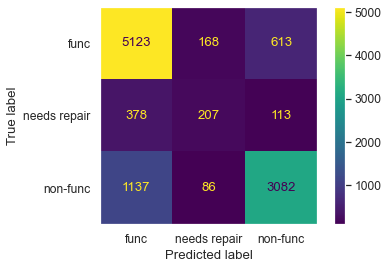

Training Accuracy (Model 2): 86.04%
Validation Accuracy (Model 2): 77.12%


In [98]:
# Define hyperparameters to tune for Model 2
param_grid_model2 = {
    'classifier__max_depth': [None, 10, 20, 30, 40], 
    'classifier__min_samples_split': [2, 5, 10, 15], 
    'classifier__criterion': ['entropy', 'gini']  
}

# Create GridSearchCV object 
grid_search_model2 = GridSearchCV(pipeline_dt, param_grid_model2, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the pipeline to your training data with cross-validation
grid_search_model2.fit(X_train, y_train)

# Get the best estimator from the grid search
best_estimator_model2 = grid_search_model2.best_estimator_

# Make predictions on the test data 
y_pred_dt_model2 = best_estimator_model2.predict(X_test)

# Print classification report and other metrics 
model_score(best_estimator_model2.named_steps['classifier'], y_test, y_pred_dt_model2)

# Calculate training and validation accuracy 
training_accuracy_model2 = grid_search_model2.score(X_train, y_train)
validation_accuracy_model2 = grid_search_model2.score(X_test, y_test)

print('Training Accuracy (Model 2): {:.4}%'.format(training_accuracy_model2 * 100))
print('Validation Accuracy (Model 2): {:.4}%'.format(validation_accuracy_model2 * 100))

The second tuned decision tree model  indicates that the additional tuning enhances predictive accuracy given that __the model achieves an accuracy of 77.12% on the validation dataset__, which is a slight improvement over the first tuned model's accuracy of 76.85%.

The __"functional needs repair" class precision increased to 45%__, indicating a significant improvement in precision for this class. The recall scores for the classes also show improvements as the __"functional needs repair" class recall increased to 30% and the  "non-functional" class recall increased to 72%__.

The __weighted average F1-score for the second tuned model is 0.7649__, slightly higher than the first tuned model's score of 0.7625. This suggests additional tuning further improves the balance between precision and recall across all classes.

The model's __training accuracy of 86.04%__ is slightly lower than the first tuned model's training accuracy suggesting  that additional tuning may have introduced some regularization and improved generalization.

                         precision    recall  f1-score   support

             functional       0.77      0.88      0.82      5904
functional needs repair       0.44      0.26      0.32       698
         non functional       0.82      0.72      0.76      4305

               accuracy                           0.77     10907
              macro avg       0.68      0.62      0.64     10907
           weighted avg       0.77      0.77      0.77     10907

Overall accuracy score 0.7739066654442102
Overall precision score 0.7671939941432707
Overall recall score 0.7739066654442102
Overall F1-score 0.7657948267341179


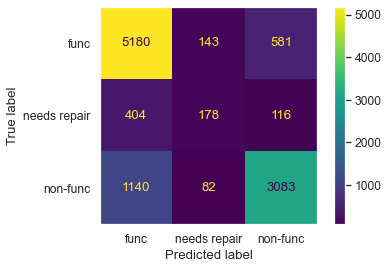

Training Accuracy (Model 3): 83.91%
Validation Accuracy (Model 3): 77.39%


In [99]:
# Define hyperparameters to tune for Model 3
param_grid_model3 = {
    'classifier__criterion': ['entropy', 'gini'],
    'classifier__max_depth': [10, 20, 30, None], 
    'classifier__min_samples_split': [5, 10, 20],  
    'classifier__min_samples_leaf': [1, 2, 4, 8],  
    'classifier__max_features': ['auto', 'sqrt', 'log2', None],  
    'classifier__splitter': ['best', 'random'] 
}

# Create GridSearchCV object
grid_search_model3 = GridSearchCV(pipeline_dt, param_grid_model3, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the pipeline to your training data with cross-validation 
grid_search_model3.fit(X_train, y_train)

# Get the best estimator from the grid search
best_estimator_model3 = grid_search_model3.best_estimator_

# Make predictions on the test data 
y_pred_dt_model3 = best_estimator_model3.predict(X_test)

# Print classification report and other metrics 
model_score(best_estimator_model3.named_steps['classifier'], y_test, y_pred_dt_model3)

# Calculate training and validation accuracy
training_accuracy_model3 = grid_search_model3.score(X_train, y_train)
validation_accuracy_model3 = grid_search_model3.score(X_test, y_test)

print('Training Accuracy (Model 3): {:.4}%'.format(training_accuracy_model3 * 100))
print('Validation Accuracy (Model 3): {:.4}%'.format(validation_accuracy_model3 * 100))

The __final tuned decision tree model achieves an overall accuracy score of 0.7739__, a slight improvement over the preceding model's accuracy of 0.7712 which indicates an enhancement in predictive accuracy.

Precision scores for the three classes show mixed results in the final tuned model with the __"functional" and "non-functional" class precision scores remaining the same at 77% and 82% respectively. The "functional needs repair" class precision however increased to 44%__, indicating better precision for this class. 

Recall scores show some variations as well with the __"functional" class recall remaining at 88% and the "non-functional" class recall remaining at 72%__  indicating the model's capacity to accurately identify these instances.

The __weighted average F1-score for the final tuned model is 0.7658__, which is slightly higher than that of the preceding model implying that additional tuning further improves the balance between precision and recall across all classes.

The __training accuracy for the final decision tree model is 83.91%__, which is lower than the preceding model's training accuracy of 86.04%. This suggests that the final tuning introduced more regularization, potentially improving overfitting.

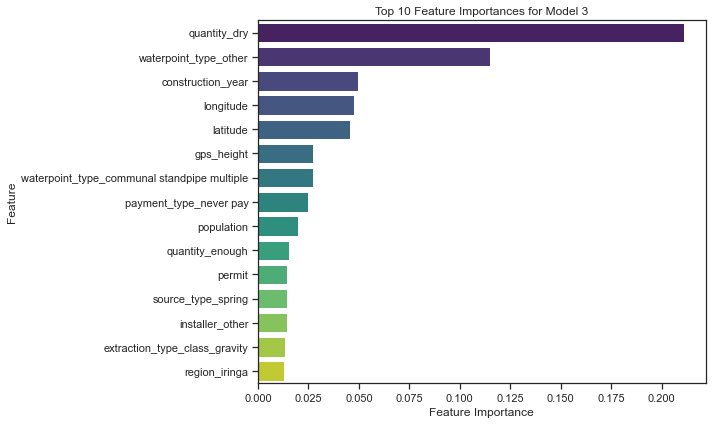

In [110]:
# Get feature importances from the best estimator of Model 3
feature_importances_model3 = best_estimator_model3.named_steps['classifier'].feature_importances_

# Get the column names of the features
feature_names = X_train.columns

# Sort feature importances and get the top 15
sorted_indices = np.argsort(feature_importances_model3)[::-1]
sorted_feature_importances = feature_importances_model3[sorted_indices]

# Get the top 15 feature importances from the best estimator of Model 3
n_top_features = 15
top_feature_indices = sorted_indices[:n_top_features]
top_feature_names = [feature_names[i] for i in top_feature_indices]
top_feature_importances = sorted_feature_importances[:n_top_features]

# Plot the top 10 feature importances using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_feature_importances, y=top_feature_names, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances for Model 3')
plt.tight_layout()
plt.show()

Looking at the feature importances of the 3rd tuned decision tree classification model, at the forefront is __"quantity_dry" a feature with the highest importance (21.13%)__, signifying the significant role of water scarcity in forecasts. __"Waterpoint_type_other"__ follows closely with __11.51%__, underlining the substantial impact of the "other" waterpoint category. The __"construction_year" (4.95%)__ holds moderate importance, emphasizing the influence of a waterpoint's age on predictions. Geographic coordinates play a role as well, with __"longitude" (4.76%)__ and __"latitude" (4.54%)__ both deemed moderately important. Together, these top features offer valuable insights into the model's decision-making process, helping prioritize actions related to waterpoint functionality and upkeep.

## K Nearest Neighbors Baseline Model

                         precision    recall  f1-score   support

             functional       0.77      0.87      0.81      5904
functional needs repair       0.46      0.29      0.35       698
         non functional       0.80      0.71      0.76      4305

               accuracy                           0.77     10907
              macro avg       0.68      0.62      0.64     10907
           weighted avg       0.76      0.77      0.76     10907

Overall accuracy score 0.7683139268359769
Overall precision score 0.7625607449890514
Overall recall score 0.7683139268359769
Overall F1-score 0.7613272163550013


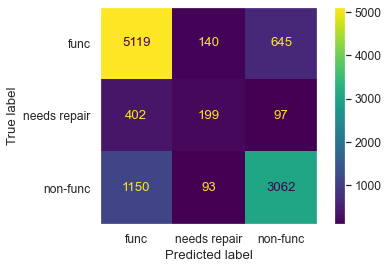

Training Accuracy: 83.64%
Validation accuracy: 76.83%


In [100]:
# Define the pipeline
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

# Fit the KNN model
knn_pipeline.fit(X_train, y_train)

# Make predictions on the test data
knn_y_pred = knn_pipeline.predict(X_test)

# Print classification report and other metrics
model_score(knn_pipeline.named_steps['classifier'], y_test, knn_y_pred)

# Predict on training and test sets
training_pred_knn = knn_pipeline.predict(X_train)
knn_y_pred = knn_pipeline.predict(X_test)

# Accuracy of training and test sets
training_accuracy_knn = accuracy_score(y_train, training_pred_knn)
test_accuracy_knn = accuracy_score(y_test, knn_y_pred)

print('Training Accuracy: {:.4}%'.format(training_accuracy_knn * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy_knn * 100))

The baseline KNN model achieves an __accuracy of 76.83% on the validation dataset__, indicating its ability to correctly classify water points.

The precision scores for the three classes demonstrate moderate performance. The __"functional" class has a precision of 77% while the "non-functional" class precision is 80%__, suggesting that it can accurately predict functional and non-functional water points. The __"functional needs repair" class shows lower precision at 46%__, indicating that the model's ability to predict water points in need of repair is relatively limited.

Recall scores also show moderate performance. __It excels in identifying functional water points with a robust 87% recall__. While it also exhibits a __reasonable 71% recall for non-functional water points, it struggles to effectively recall water points in need of repair, with a notably lower 29% recall rate__ in this category. This indicates that the model's ability to identify water points requiring repair is limited compared to its performance in recognizing functional and non-functional water points.

The __weighted average F1-score for the baseline KNN model is 0.7613__, demonstrating a reasonable balance between precision and recall across all classes.

The __training accuracy for the baseline KNN model is 83.64%__, indicating that the model performs well on the training data but exhibits some drop in performance on the validation set although the model should still be able to generalize reasonable well to unseen data.

## K Nearest Neighbors with Hyperparameter Tuning

                         precision    recall  f1-score   support

             functional       0.80      0.85      0.82      5904
functional needs repair       0.45      0.33      0.38       698
         non functional       0.80      0.76      0.78      4305

               accuracy                           0.78     10907
              macro avg       0.68      0.65      0.66     10907
           weighted avg       0.78      0.78      0.78     10907

Overall accuracy score 0.7826166681947373
Overall precision score 0.7769755150308496
Overall recall score 0.7826166681947373
Overall F1-score 0.7786168461592032


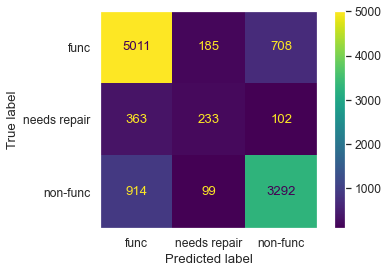

Training Accuracy (Tuned KNN): 100.0%
Validation Accuracy (Tuned KNN): 78.26%


In [101]:
# Define the hyperparameters to search
param_grid_knn1 = {
    'classifier__n_neighbors': [3, 5, 7], 
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2] 
}

# Create GridSearchCV object
grid_search_knn1 = GridSearchCV(knn_pipeline, param_grid_knn1, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the pipeline to your training data with cross-validation
grid_search_knn1.fit(X_train, y_train)

# Get the best estimator from the grid search
best_estimator_knn1 = grid_search_knn1.best_estimator_

# Make predictions on the test data
knn_y_pred1 = best_estimator_knn1.predict(X_test)

# Print classification report and other metrics
model_score(best_estimator_knn1.named_steps['classifier'], y_test, knn_y_pred1)

# Calculate training and validation accuracy
training_accuracy_knn1 = grid_search_knn1.score(X_train, y_train)
validation_accuracy_knn1 = grid_search_knn1.score(X_test, y_test)

print('Training Accuracy (Tuned KNN): {:.4}%'.format(training_accuracy_knn1 * 100))
print('Validation Accuracy (Tuned KNN): {:.4}%'.format(validation_accuracy_knn1 * 100))

The KNN model with hyperparameter tuning exhibits notable improvements in performance compared to the baseline KNN model. __The tuned KNN model achieves an accuracy of 78.26% on the validation dataset, surpassing the baseline's accuracy of 76.83%__. 

The __precision scores remain similar to the baseline across the three classes__, with "functional" at 80%, "functional needs repair" at 45%, and "non-functional" at 80%. This indicates that __the tuned model maintains precision levels while improving overall accuracy__.

The tuned KNN model demonstrates __a slight increase in recall for the "functional needs repair" class, rising from 29% in the baseline to 33%__. This enhancement is indicative of the model's improved ability to identify water points in need of repair. 

The __weighted average F1-score for the tuned KNN model is 0.7786, slightly higher than the baseline's F1-score of 0.7613__. This improvement signifies a more balanced trade-off between precision and recall across all classes in the tuned model.

The __training accuracy for the tuned KNN model is 100%__, which may pose a challenge in the model's ability to make predictions on unseen data. __The difference between training and validation accuracy is a strong indicator of overfitting__.

                         precision    recall  f1-score   support

             functional       0.79      0.87      0.83      5904
functional needs repair       0.49      0.31      0.38       698
         non functional       0.81      0.76      0.79      4305

               accuracy                           0.79     10907
              macro avg       0.70      0.64      0.66     10907
           weighted avg       0.78      0.79      0.78     10907

Overall accuracy score 0.7881177225634913
Overall precision score 0.7813242959359747
Overall recall score 0.7881177225634913
Overall F1-score 0.7821292359618008


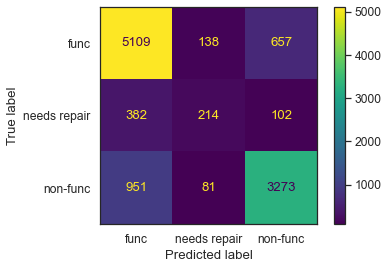

Training Accuracy (Tuned KNN): 100.0%
Validation Accuracy (Tuned KNN): 78.81%


In [133]:
# Define hyperparameters to tune
param_grid_knn3 = {
    'classifier__n_neighbors': [7, 9, 11, 13, 15, 17], 
    'classifier__weights': ['distance'],
    'classifier__p': [1],
}

# Create GridSearchCV object
grid_search_knn3 = GridSearchCV(knn_pipeline, param_grid_knn3, cv=3, scoring='accuracy')

# Fit the pipeline to your training data with cross-validation
grid_search_knn3.fit(X_train, y_train)

# Get the best estimator from the grid search
best_estimator_knn3 = grid_search_knn3.best_estimator_

# Make predictions on the test data
knn_y_pred3 = best_estimator_knn3.predict(X_test)

# Print classification report and other metrics
model_score(best_estimator_knn3.named_steps['classifier'], y_test, knn_y_pred3)

# Calculate training and validation accuracy
training_accuracy_knn3 = grid_search_knn3.score(X_train, y_train)
validation_accuracy_knn3 = grid_search_knn3.score(X_test, y_test)

print('Training Accuracy (Tuned KNN): {:.4}%'.format(training_accuracy_knn3 * 100))
print('Validation Accuracy (Tuned KNN): {:.4}%'.format(validation_accuracy_knn3 * 100))

Further tuning of the model returned improved results. __The final tuned KNN model achieves an accuracy of 78.81% on the validation dataset__, which is a slight improvement over the first tuned model's accuracy of 78.26%. This indicates that the final tuned model is better at correctly classifying water points.

Precision scores for the three classes show an improvement in the final tuned model as __the "functional needs repair" class precision increased to 49% and the "non-functional" class increased precision to 81%__. These improvements highlight the final tuned model's enhanced ability to accurately predict water points in these categories.

__The final tuned KNN model exhibits a higher recall for the "functional" class, reaching 87%__ indicating the model's improved ability to identify water points in need of repair. The __"non-functional" class maintains a recall of 76%__, indicating consistent performance. Although the __"functional needs repair" class recall decreases slightly from 33% to 31%__.

The __weighted average F1-score for the final tuned KNN model is 0.7821, which is a slight improvement over the first tuned model's F1-score of 0.7786__. This suggests a balanced trade-off between precision and recall across all classes, with a slight improvement in the final tuned model.

__Both the first tuned model and the final tuned model achieved 100% training accuracy__, an indication of overfitting noting the difference between the traning accuracy and validation accuracy.

## Random Forest Baseline Model

                         precision    recall  f1-score   support

             functional       0.81      0.88      0.84      5904
functional needs repair       0.49      0.31      0.38       698
         non functional       0.83      0.78      0.81      4305

               accuracy                           0.80     10907
              macro avg       0.71      0.66      0.68     10907
           weighted avg       0.80      0.80      0.80     10907

Overall accuracy score 0.8028788851196479
Overall precision score 0.7962382819754282
Overall recall score 0.8028788851196479
Overall F1-score 0.797219351217849


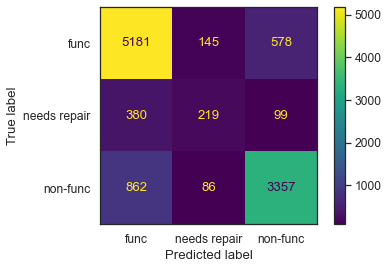

Training Accuracy: 99.99%
Validation accuracy: 80.29%


In [111]:
# Define the pipeline 
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline to your training data
pipeline_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = pipeline_rf.predict(X_test)

# Use the model_score function to print statistics and display the confusion matrix
model_score(pipeline_rf.named_steps['classifier'], y_test, y_pred_rf)

# Predict on training and test sets
training_pred3 = pipeline_rf.predict(X_train)
y_pred_rf = pipeline_rf.predict(X_test)

# Accuracy of training and test sets
training_accuracy3 = accuracy_score(y_train, training_pred3)
test_accuracy3 = accuracy_score(y_test, y_pred_rf)

print('Training Accuracy: {:.4}%'.format(training_accuracy3 * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy3 * 100))

__The model achieves an accuracy of 80.29% on the validation dataset__, indicating its ability to correctly classify water points. A significant improvement on the previous models.

The baseline Random Forest model exhibits varying precision, recall, and F1-score for the three classes. It has a __high precision and recall for the "functional" and "non-functional" classes__, indicating that it accurately classifies these instances. However, it has __significantly low precision and recall for the "functional needs repair" class__, suggesting some difficulty in correctly identifying this category.

The __weighted average F1-score for the baseline Random Forest model is 0.7972__, indicating a well-balanced trade-off between precision and recall across all classes.

__The model's high training accuracy is 99.99%__, this is substantially higher than the validation accuracy of 80.29%. This large discrepancy between training and validation accuracy suggests that the model may be overfitting the training data, meaning it has learned the training data too well and may not generalize effectively to unseen data. We will attempt to address this by adjusting the hyperparameters.

## Random Forest with Hyperparameter Tuning

                         precision    recall  f1-score   support

             functional       0.78      0.92      0.85      5904
functional needs repair       0.65      0.24      0.36       698
         non functional       0.87      0.74      0.80      4305

               accuracy                           0.81     10907
              macro avg       0.76      0.64      0.67     10907
           weighted avg       0.81      0.81      0.80     10907

Overall accuracy score 0.8078298340515265
Overall precision score 0.8070997530318381
Overall recall score 0.8078298340515265
Overall F1-score 0.7967603328737484


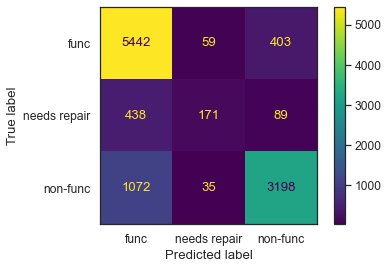

Training Accuracy: 91.6%
Validation Accuracy: 80.78%


In [138]:
# Define hyperparameters to tune
param_grid_rf = {
    'classifier__n_estimators': [150, 250, 350],  # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20, 30],
}

# Create GridSearchCV object
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the pipeline to your training data with cross-validation
grid_search_rf.fit(X_train, y_train)

# Get the best estimator from the grid search
best_estimator_rf = grid_search_rf.best_estimator_

# Make predictions on the test data
y_pred_rf = best_estimator_rf.predict(X_test)

# Print classification report and other metrics
model_score(best_estimator_rf.named_steps['classifier'], y_test, y_pred_rf)

# Calculate training and validation accuracy
training_accuracy_rf = grid_search_rf.score(X_train, y_train)
validation_accuracy_rf = grid_search_rf.score(X_test, y_test)

print('Training Accuracy: {:.4}%'.format(training_accuracy_rf * 100))
print('Validation Accuracy: {:.4}%'.format(validation_accuracy_rf * 100))

__The tuned Random Forest model exhibits an improved overall validation accuracy of approximately 80.78%__, which is slightly better than the baseline model's accuracy of 80.29% signifying that the model's ability to correctly classify water points remains strong.

__The precision scores for the "functional needs repair" and "non-functional" classes show improved precision as they see an increase in precision to 65% and 87% respectively__. The recall performance of the tuned model is a key highlight with __the "functional" class recall increasing to a strong 92%__, indicating the model's effectiveness in correctly identifying functional water points. __The "non-functional" class recall remains respectable at 74% although the "functional needs repair" class recall is relatively low at 24%__.

__The weighted average F1-score for the tuned model is 0.7968__, reflecting a reasonable balance between precision and recall across all classes. While this is slightly lower than the baseline model's F1-score (0.7972), the trade-off between precision and recall is more balanced in the tuned model.

While __the training accuracy remains high at 91.6%__, it's notably lower than the baseline model's 99.99%. This suggests that the first tuned model has reduced overfitting, making it more robust and better suited to generalize to unseen data.

                         precision    recall  f1-score   support

             functional       0.79      0.90      0.85      5904
functional needs repair       0.60      0.26      0.36       698
         non functional       0.85      0.76      0.80      4305

               accuracy                           0.81     10907
              macro avg       0.75      0.64      0.67     10907
           weighted avg       0.80      0.81      0.80     10907

Overall accuracy score 0.8081965710094435
Overall precision score 0.803168218299176
Overall recall score 0.8081965710094435
Overall F1-score 0.7984451084672377


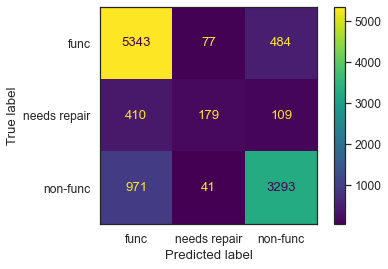

Training Accuracy: 90.02%
Validation Accuracy: 80.82%


In [140]:
# Define hyperparameters to tune
param_grid_rf1 = {
    'classifier__n_estimators': [250, 350],
    'classifier__max_depth': [20, 40],
    'classifier__criterion': ['gini', 'entropy'],  
    'classifier__min_samples_split': [2, 5, 10],  
    'classifier__min_samples_leaf': [1, 2, 4], 
}

# Create GridSearchCV object
grid_search_rf1 = GridSearchCV(pipeline_rf, param_grid_rf1, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the pipeline to your training data with cross-validation
grid_search_rf1.fit(X_train, y_train)

# Get the best estimator from the grid search
best_estimator_rf1 = grid_search_rf1.best_estimator_

# Make predictions on the test data
y_pred_rf1 = best_estimator_rf1.predict(X_test)

# Print classification report and other metrics
model_score(best_estimator_rf1.named_steps['classifier'], y_test, y_pred_rf1)

# Calculate training and validation accuracy
training_accuracy_rf1 = grid_search_rf1.score(X_train, y_train)
validation_accuracy_rf1 = grid_search_rf1.score(X_test, y_test)

print('Training Accuracy: {:.4}%'.format(training_accuracy_rf1 * 100))
print('Validation Accuracy: {:.4}%'.format(validation_accuracy_rf1 * 100))

__The final model achieves an accuracy of 80.82% on the validation dataset__, which is a slight increase from the preceding model's 80.78%. This signifies a minor enhancement in the model's capacity to accurately classify instances. Hoever, __the precision scores for the three classes in the final model decrease slightly for the three classes although not significantly__.  

Although it has declined marginally, __the "functional" class recall remains strong at 90%__, indicating the model's effectiveness in correctly identifying functional water points. __The "functional needs repair" class recall, although relatively low at 26%, has increased slighly relative to the preceeding model. The "non-functional" class recall remains respectable at 76%__. Overall, the final tuned model maintains strong recall performance for the "functional" and "non-functional" classes while showing a moderate recall for the "functional needs repair" class.

__The weighted average F1-score for the final tuned model has improved to 0.7984__, demonstrating a reasonable balance between precision and recall across all classes.

Through further refinements, __this model achieved a training accuracy of 90.92%__. In contrast, the first tuned model had a higher training accuracy of 91.6%. This reduction in training accuracy indicates a step taken towards mitigating overfitting, rendering the model more robust and suitable for generalization.

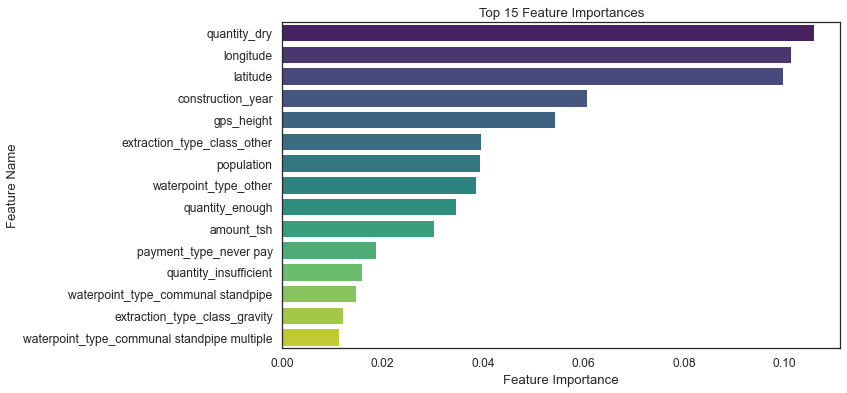

In [84]:
# Get feature importances from the best estimator of Model 2
feature_importances = best_estimator_rf1.named_steps['classifier'].feature_importances_

# Get the indices of the top 15 feature importances
top_15_indices = feature_importances.argsort()[::-1][:15]

# Get the feature names
feature_names = X_train.columns

# Get the top 15 feature importances and their corresponding feature names
top_feature_importances = [feature_importances[i] for i in top_15_indices]
top_feature_names = [feature_names[i] for i in top_15_indices]

# Create a horizontal bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.set_style('white')
sns.barplot(x=top_feature_importances, y=top_feature_names, palette="viridis")
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Top 15 Feature Importances')
plt.show()

In the final Random Forest model, the most important features have been identified in terms of their percentage contributions to the prediction of water point functionality. Notably, __"quantity_dry" stands out as the most crucial factor, accounting for approximately __10.57%__ of the model's predictive power, highlighting the significant impact of water scarcity on functionality. Following closely are __"longitude" and "latitude," each contributing around 10.12% and 9.96%__, respectively, emphasizing the substantial influence of geographical location. __"construction_year" plays a vital role, representing 6.07% importance__, while __"gps_height" contributes approximately 5.43%__, highlighting the significance of water point elevation. These findings provide valuable insights into the key determinants of water point functionality and can inform future policy decisions and interventions related to clean water access.

## XG Boost Baseline Model

                         precision    recall  f1-score   support

             functional       0.77      0.91      0.84      5904
functional needs repair       0.65      0.22      0.33       698
         non functional       0.85      0.73      0.79      4305

               accuracy                           0.80     10907
              macro avg       0.76      0.62      0.65     10907
           weighted avg       0.80      0.80      0.78     10907

Overall accuracy score 0.7967360410745393
Overall precision score 0.7958960943270122
Overall recall score 0.7967360410745393
Overall F1-score 0.7845974224154318


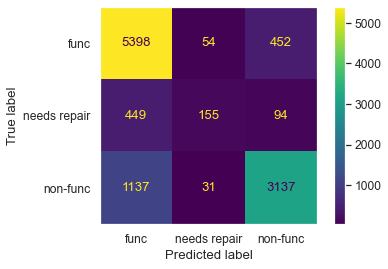

Training Accuracy: 83.79%
Validation accuracy: 79.67%


In [103]:
# Define the pipeline
pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()), 
    ('classifier', XGBClassifier(random_state=42))
])

# Fit the pipeline to your training data
pipeline_xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = pipeline_xgb.predict(X_test)

# Use the model_score function to print statistics and display the confusion matrix
model_score(pipeline_xgb.named_steps['classifier'], y_test, y_pred_xgb)

# Predict on training and test sets
training_pred_xgb = pipeline_xgb.predict(X_train)
y_pred_xgb = pipeline_xgb.predict(X_test)

# Accuracy of training and test sets
training_accuracy_xgb = accuracy_score(y_train, training_pred_xgb)
test_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print('Training Accuracy: {:.4}%'.format(training_accuracy_xgb * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy_xgb * 100))

__The model achieves an accuracy of 79.67%__, which means it correctly predicts the class of water points in the validation dataset about 79.67% of the time. Its precision scores vary across the three classes. Notably, the precision for the "functional needs repair" class is the lowest at 65%, suggesting that predictions in this category are less reliable.

The recall scores also vary across classes. __The model exhibits high recall for the "functional" and "non-functional" classes__, indicating that it successfully identifies a significant portion of these instances. However, __the recall for the "functional needs repair" class is lower at 22%__, indicating that the model misses a substantial number of instances in this category.

The __weighted average F1-score is 0.7846__, indicates a reasonably balanced trade-off between precision and recall.

The __training accuracy is notably higher at 83.79%__, indicating that the model performs very well on the training data. However, the notable difference between training and validation accuracy suggests potential overfitting. 

## XG Boost with Hyperparameter Tuning

                         precision    recall  f1-score   support

             functional       0.78      0.91      0.84      5904
functional needs repair       0.60      0.27      0.37       698
         non functional       0.86      0.74      0.80      4305

               accuracy                           0.80     10907
              macro avg       0.75      0.64      0.67     10907
           weighted avg       0.80      0.80      0.79     10907

Overall accuracy score 0.8026038324012102
Overall precision score 0.8004880672226478
Overall recall score 0.8026038324012102
Overall F1-score 0.7928501775748678


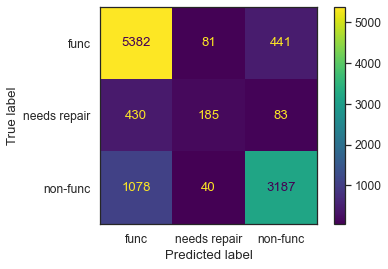

Training Accuracy: 89.31%
Validation accuracy: 81.0%


In [144]:
# Define a reduced set of hyperparameters to tune
param_grid_xgb_ = {
    'classifier__learning_rate': [0.1],
    'classifier__max_depth': [6, 8, 10],
    'classifier__min_child_weight': [1],
    'classifier__n_estimators': [200],
}

# Create GridSearchCV object
grid_search_xgb_ = GridSearchCV(pipeline_xgb, param_grid_xgb_, cv=5, scoring='accuracy')

# Fit the pipeline to your training data with cross-validation and hyperparameter tuning
grid_search_xgb_.fit(X_train, y_train)

# Get the best estimator from the grid search
best_estimator_xgb_ = grid_search_xgb_.best_estimator_

# Make predictions on the test data
y_pred_xgb_ = best_estimator_xgb_.predict(X_test)

# Use the model_score function to print performance statistics and display the confusion matrix
model_score(best_estimator_xgb_.named_steps['classifier'], y_test, y_pred_xgb_)

# Predict on training and test sets
training_pred_xgb_ = best_estimator_xgb_.predict(X_train)
y_pred_xgb_ = best_estimator_xgb_.predict(X_test)

# Accuracy of training and test sets
training_accuracy_xgb_ = accuracy_score(y_train, training_pred_xgb_)
test_accuracy_xgb_ = accuracy_score(y_test, y_pred_xgb1)

print('Training Accuracy: {:.4}%'.format(training_accuracy_xgb_ * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy_xgb_ * 100))

__The tuned XGBoost model achieves an accuracy of 81.0% on the validation dataset__, which is slightly higher than the baseline model's accuracy of 79.67%. This indicates that the tuned model has better predictive accuracy.

The precision scores for the three classes vary. __The "functional" class precision increases to 78%, while the "functional needs repair" class precision improves to 60%. The "non-functional" class precision remains high at 86%__. Overall, the tuned model shows a balanced improvement in precision across classes.

The recall scores for the classes also show improvements. __The "functional" and "non-functional" classes exhibit higher recall__, suggesting better identification of instances in these categories. However, __the "functional needs repair" class's recall remains low at 27%__, indicating room for improvement.

The __weighted average F1-score is 0.7929__, slightly higher than the baseline model's F1-score of 0.7846. This suggests an overall improvement in the model's ability to balance precision and recall.
 
The __training accuracy for the tuned model is notably higher at 89.31%__, indicating that the model has learned well from the training data. However, the difference in training and validation accuracy raises concerns about potential overfitting, and further fine-tuning or regularization techniques may be required to improve generalization.

                         precision    recall  f1-score   support

             functional       0.79      0.91      0.85      5904
functional needs repair       0.58      0.30      0.39       698
         non functional       0.86      0.76      0.81      4305

               accuracy                           0.81     10907
              macro avg       0.74      0.66      0.68     10907
           weighted avg       0.81      0.81      0.80     10907

Overall accuracy score 0.8100302557990281
Overall precision score 0.8062899166465556
Overall recall score 0.8100302557990281
Overall F1-score 0.8021044089672305


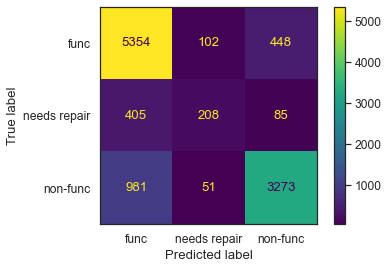

Training Accuracy: 91.09%
Validation accuracy: 81.0%


In [128]:
# Define a reduced set of hyperparameters to tune
param_grid_xgb1 = {
    'classifier__learning_rate': [0.1],
    'classifier__max_depth': [10],
    'classifier__min_child_weight': [1],
    'classifier__n_estimators': [200],
    'classifier__subsample': [0.7],
}

# Create GridSearchCV object
grid_search_xgb1 = GridSearchCV(pipeline_xgb, param_grid_xgb1, cv=5, scoring='accuracy')

# Fit the pipeline to your training data with cross-validation and hyperparameter tuning
grid_search_xgb1.fit(X_train, y_train)

# Get the best estimator from the grid search
best_estimator_xgb1 = grid_search_xgb1.best_estimator_

# Make predictions on the test data
y_pred_xgb1 = best_estimator_xgb1.predict(X_test)

# Use the model_score function to print performance statistics and display the confusion matrix
model_score(best_estimator_xgb1.named_steps['classifier'], y_test, y_pred_xgb1)

# Predict on training and test sets
training_pred_xgb1 = best_estimator_xgb1.predict(X_train)
y_pred_xgb1 = best_estimator_xgb1.predict(X_test)

# Accuracy of training and test sets
training_accuracy_xgb1 = accuracy_score(y_train, training_pred_xgb1)
test_accuracy_xgb1 = accuracy_score(y_test, y_pred_xgb1)

print('Training Accuracy: {:.4}%'.format(training_accuracy_xgb1 * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy_xgb1 * 100))

__The final XGBoost model maintains a high level of predictive accuracy having achieved an accuracy of 81.0% on the validation dataset__.

The precision scores for the three classes are somewhat similar to the first tuned model. __The "functional" and "non-functional" classes exhibit high precision, with slight improvements in the final model__. However, the __"functional needs repair" class precision remains relatively low at 58%__, which is slightly lower than the preceding model.

The recall scores for the classes also show a pattern similar to the first tuned model. __The "functional" and "non-functional" classes maintain high recall__. However, __the "functional needs repair" class's recall increases slightly to 30%__ in the final model, indicating a modest improvement.

The __weighted average F1-score for the final model is 0.8021__, which is slightly higher than the first tuned model's F1-score of 0.7929 indicating an overall improvement in the model's ability to balance precision and recall.

The __training accuracy for the final model is higher at 91.09%__,  indicating that the model learned the training data quite well and was able to predict it accurately. Although the gap between the traning and validation accuracy doesn't indicate severe overfitting, further steps like regularization, cross-validation, or collecting more diverse data could help address this issue and reduce the overfitting risk.

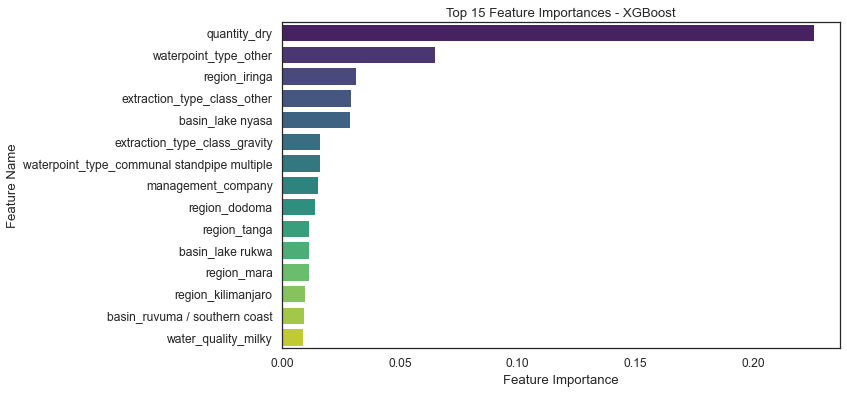

In [180]:
# Extract feature importances from the XGBoost model
feature_importances_xgb = best_estimator_xgb1.named_steps['classifier'].feature_importances_

# Get the indices of the top 15 feature importances
top_15_indices_xgb = feature_importances.argsort()[::-1][:15]

# Get the feature names
feature_names_xgb = X_train.columns

# Get the top 15 feature importances and their corresponding feature names
top_feature_importances_xgb = [feature_importances_xgb[i] for i in top_15_indices]
top_feature_names_xgb = [feature_names_xgb[i] for i in top_15_indices]

# Create a horizontal bar plot using Seaborn with the Viridis color palette
plt.figure(figsize=(10, 6))
sns.set_style('white')
sns.barplot(x=top_feature_importances_xgb, y=top_feature_names_xgb, palette="viridis")
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Top 15 Feature Importances - XGBoost')
plt.show()

In the final XGBoost model, we have identified the top most important features, highlighting their respective contributions to the prediction of water point functionality. Notably, __"quantity_dry" emerges as the most critical factor, accounting for approximately 22.58% of the model's predictive power__, underscoring the significant impact of water scarcity on functionality. Following closely is __"waterpoint_type_other," contributing around 6.50%__, emphasizing the substantial influence of "other" waterpoint types on water point functionality. __"region_iringa" plays a vital role, representing 3.12%__ importance.
These findings provide valuable insights into the key determinants of water point functionality and can inform future policy decisions and interventions related to clean water access.

## XG Boost with SMOTE

SMOTE (Synthetic Minority Over-sampling Technique) is __applied to handle class imbalance in the target variable__. The goal is to evaluate if the top-performing model, XG Boost, can benefit from this technique to mitigate its bias toward the majority classes, being the "functional" and "non-functional" waterpoints.

In [148]:
# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(y_train.value_counts())
print(y_train_resampled.value_counts())

functional                 23812
non functional             16880
functional needs repair     2933
Name: status_group, dtype: int64
functional needs repair    23812
non functional             23812
functional                 23812
Name: status_group, dtype: int64


                         precision    recall  f1-score   support

             functional       0.81      0.85      0.83      5904
functional needs repair       0.37      0.44      0.40       698
         non functional       0.85      0.77      0.81      4305

               accuracy                           0.79     10907
              macro avg       0.68      0.69      0.68     10907
           weighted avg       0.80      0.79      0.80     10907

Overall accuracy score 0.7938021454112039
Overall precision score 0.8001671023394801
Overall recall score 0.7938021454112039
Overall F1-score 0.7957722246510798


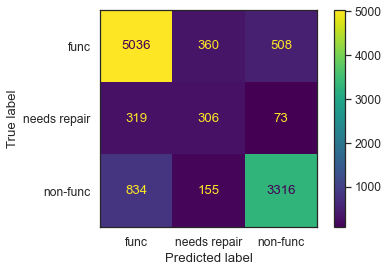

Training Accuracy: 90.68%
Validation accuracy: 79.38%


In [152]:
# Instatiate XGB pipeline with SMOTE preprocessing
xgb_smote = Pipeline([('ss', StandardScaler()), 
                      ('xgb smote', XGBClassifier(learning_rate=0.1, max_depth=10, min_child_weight=1,
                        n_estimators=200, subsample=0.7))])
xgb_smote.fit(X_train_resampled, y_train_resampled)
y_pred_xgb_smote = xgb_smote.predict(X_test)

# Use the model_score function to print performance statistics and display the confusion matrix
model_score(xgb_smote, y_test, y_pred_xgb_smote)

# Predict on training and test sets
training_pred_smote = xgb_smote.predict(X_train)
y_pred_xgb_smote = xgb_smote.predict(X_test)

# Accuracy of training and test sets
training_accuracy_smote = accuracy_score(y_train, training_pred_smote)
test_accuracy_smote = accuracy_score(y_test, y_pred_xgb_smote)

print('Training Accuracy: {:.4}%'.format(training_accuracy_smote * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy_smote * 100))

The XG Boost model with SMOTE, while showing competitive performance, __exhibits a slightly lower overall accuracy and F1-score compared to the tuned XG Boost model without SMOTE. The tuned XG Boost achieved an accuracy of 81%, while the XG Boost with SMOTE achieved an accuracy of 79.38% on the validation dataset__. This indicates that the model with SMOTE has a marginally lower ability to correctly classify instances.

In terms of precision and recall, the tuned XG Boost generally outperforms the XG Boost with SMOTE. __The "functional needs repair" class shows a notable difference, with the XG Boost model having higher precision and lower recall, while the SMOTE model has lower precision and higher recall__. This suggests a trade-off between precision and recall for this class.

Overall, the XG Boost with SMOTE provides a reasonable balance between precision and recall, especially for the "functional needs repair" class. However, it falls slightly short of the tuned XG Boost model's overall performance, particularly in terms of accuracy and F1-score.

### Summary Model Performance Scores

In [177]:
# Store your best models in a list
models = [best_estimator_lr, best_estimator_model3, best_estimator_knn3, best_estimator_rf1, best_estimator_xgb1]
model_names = ['Linear Regression', 'Decision Tree', 'KNN', 'Random Forest', 'XG Boost']

# Initialize lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Compute performance metrics for each model
for name, model in zip(model_names, models):
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

metrics_data = {
    'Model': model_names,
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1-Score': f1_list
}

df_metrics = pd.DataFrame(metrics_data)
df_metrics

,Model,Accuracy,Precision,Recall,F1-Score
0,Linear Regression,0.741725,0.725382,0.741725,0.717297
1,Decision Tree,0.773907,0.767194,0.773907,0.765795
2,KNN,0.788118,0.781324,0.788118,0.782129
3,Random Forest,0.808197,0.803168,0.808197,0.798445
4,XG Boost,0.810030,0.806290,0.810030,0.802104


# Evaluation

XG Boost outperforms other models in terms of accuracy, precision, recall, and F1-Score, making it the best-performing model for classifying water pumps' operating conditions. It __achieves the highest accuracy of 81% and the highest F1-Score of 80.21%__. The Random Forest Classifier is not far behind as it achieves an accuracy of 80.82% and F1-Score of 79.84%.

The XG Boost results indicates that __it is possible to correctly classify water pump functionality with 81% accuracy__. These results therefore suggest that the model is a suitable choice for use by NGOs to accurately identifying faulty water pumps and improving access to clean water in Tanzania.

__The model excelled in predicting "functional" and "non-functional" water pump conditions but struggled with the "functional needs repair" class__. The attempt to mitigate this issue using SMOTE had limited success. Hence, while the model shows promise, especially for the two dominant classes, its performance with the "functional needs repair" class remains a challenge that should be considered by the NGO when applying the model to real-world scenarios.

The following features are identified as being most crucial in water point functionality classification for the XG Boost model:
- __"quantity_dry" accounting for 22.58%__
- __"waterpoint_type_other" accounting for 6.50%__
- __"region_iringa" accounting for 3.12%__ 
- __"extraction_type_class_other" accounting for 2.93%__
- __"basin_lake nyasa" accounting for 2.86%__


## Summary Findings and Recommendations
1. __Water Quantity:__ Water availability exhibits a positive correlation with water pump functionality. Dry water points are primarily non-functional, with approximately 6,000 non-functional points and fewer than 1,000 functional ones. While regions with insufficient water have around 8,000 functional pumps. Regions with sufficient water have a high count of functional pumps, exceeding 20,000. Notably, __"quantity_dry"__ is identified as a crucial feature across the various models for predicting water well functionality.
2. __Region Analysis__: Iringa has the highest number of functional water pumps, with 4,138 in operational condition. In contrast, Morogoro reports the most non-functional pumps (1,587), followed by Mbeya (1,547) and Shinyanga (1,365). Kagera is another concern, with 1,285 non-functional pumps. Regions like Morogoro and Mbeya, with significant populations around water points, require immediate attention and maintenance to ensure clean and reliable water access.
3. __Payment Status__: "Never pay" water pumps are prevalent in Tanzania however they have a higher number of non-functioning water points compared to functioning ones. Conversely, categories involving payments show a positive correlation between payment presence and water point functionality, making payment systems a factor to consider.
4. __Water Basin__: Certain basins, such as Lake Rukwa, experience a high number of non-functional water points, accounting for nearly 50% of water points in those areas. Urgent attention and maintenance efforts are needed to secure clean and reliable water sources for communities in these basins. Disparities and infrastructure challenges are evident across different regions based on water basin status, highlighting the need for targeted interventions and improvements.
5. __Total Static Head measurement__, can potentially serve as a valuable predictor of water pump functionality. We find that when "amount_tsh" is zero,  there is an almost equal likelihood of the pump being functional or non-functional. However, an increase in "amount_tsh" corresponds to a higher likelihood of pump functionality. 
6. __Population__: water points with zero recorded populations tend to have a higher proportion of non-functional pumps. However, there is a clear correlation between population and water point functionality. As population increases, the number of both functional and non-functional pumps rises, but functional pumps remain more prevalent. The highest concentration of water points occurs in areas with around 7,000 people. 

In summary, I recommend that the NGO utilizes the XG Boost model as the primary tool for predicting water point functionality in Tanzania. This model has demonstrated its efficiency in handling complex data and achieving a remarkable accuracy rate. To address the challenges of water access, the NGO should consider the highlighted findings, particularly the significance of variables like water quantity, regional disparities and payment status. Implementation of water point maintenance strategies will also be cruicial for the NGO's success in ensuring sustainable access to clean water. It's essential for the NGO to address data quality issues by investigating the reasons behind missing and zero values, as this could significantly enhance the predictive capacity of the XG Boost model. By leveraging this powerful model and resolving data quality concerns, the NGO can make informed decisions to improve water infrastructure maintenance and provide safe and reliable water access to communities in need.


## Study Limitations
1. __Missing Data__: The dataset presented challenges due to missing values in various features. The "scheme_name" feature had the highest count of missing data (28,166 entries). Other features like "funder," "installer," "public_meeting," "scheme_management," and "permit" also contained a significant number of missing values, ranging from 333 to 3,655 entries.
2. __Data Cleaning and Standardization__: The "installer" feature contained a multitude of unique entries, often due to variations and misspellings related to different installer entities. This necessitated thorough data cleaning and standardization efforts. 
3. __Zero-Valued Features__: Several features, including 'population,' 'latitude,' and 'construction_year,' had a substantial number of zero values. The prevelance of these zero values raised concerns about data quality and integrity. For instance, in the case of 'population,' it was challenging to distinguish whether zero populations represented abandoned wells or data capture issues. The high prevalence of zero values posed challenges for handling these features during modeling.
4. __Model Tuning__: Tuning machine learning models proved to be resource-intensive, with some models taking hours to train. This time constraint limited the exploration of a wide range of hyperparameter combinations and potentially impacted the thoroughness of model optimization.
5. __Class Imbalance__: This was evident in the target variable. Despite employing oversampling techniques like SMOTE, there was limited improvement in the model's performance. To address this issue and reduce the risk of overfitting, it was suggested to consider additional strategies such as regularization, cross-validation, or expanding the dataset with more diverse data.
6. __Construction Year__: There is a distinct correlation between the age of water pumps and their functionality. Older pumps, built between approximately 1960 and 1988, are often non-functional, while newer pumps constructed after 1988 are more likely to be in working condition.


## Recommendations for Future Study
1. Implement rigorous data quality assurance measures to reduce the presence of missing values, ensure consistent data entry practices, and address zero values accurately. This will enhance the reliability of the dataset and improve modeling outcomes. Collaboration with local authorities, water management organizations, and NGOs can ensure data is frequently updated.
2. Evaluate a broader range of machine learning algorithms, including ensemble methods, and  gradient boosting, to identify the most suitable algorithms for this classification task. A more comprehensive model selection process may reveal models that perform better than the ones tested.
3. Collect more diverse and comprehensive data, especially concerning well characteristics, water quality, geological factors, and socioeconomic information of the regions. This additional data can contribute to a better understanding of water pump functionality and further improve predictive models particularly when it comes to issues of class imbalance.
